# EXPLORATORY DATA ANALYSIS (EDA) DE LAS VIVIENDAS EN VENTA EN MADRID

## 1.-CARGA DE DATOS Y LIBRERÍAS DE PYTHON.

### 1.1-CARGA DE LIBRERÍAS DE PYTHON

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import seaborn as sns

# Archivo fuente de datos
file = './Data/idealista_madrid_MODIFICADO.csv'

### 1.2-CARGA DE DATOS

In [3]:
# Array, de Numpy, con los datos de la columna "price" del archivo fuente csv.
precios = np.genfromtxt(file, usecols=(0), delimiter=",", skip_header=1, dtype=np.int64, encoding="UTF-8")

# Array, de Numpy, con los datos de la columna "baths" del archivo fuente csv.
num_banos = np.genfromtxt(file, usecols=(1), delimiter=",", skip_header=1, dtype=np.int16, encoding="UTF-8")

# Array, de Numpy, con los datos de la columna "rooms" del archivo fuente csv.
num_habitaciones = np.genfromtxt(file, usecols=(2), delimiter=",", skip_header=1, dtype=np.int16, encoding="UTF-8")

# Array, de Numpy, con los datos de la columna "sqft" del archivo fuente csv.
superficie = np.genfromtxt(file, usecols=(3), delimiter=",", skip_header=1, dtype=np.int16, encoding="UTF-8")

# Array, de Numpy, con los datos de la columna "address" del archivo fuente csv.
barrios = np.genfromtxt(file, usecols=(4), delimiter=",", skip_header=1, dtype=str, encoding="UTF-8")

## 2.-ANÁLISIS DESCRIPTIVO.

### 2.1-MEDIDAS DE TENDENCIA CENTRAL: MEDIA, MEDIANA y MODA.

#### 2.1.1-MEDIAS

In [4]:
media_precios = np.mean(precios)
media_banos = np.mean(num_banos)
media_habitaciones = np.mean(num_habitaciones)
media_superficie = np.mean(superficie)

# Se calcula también la media de las frecuencias de los barrios con viviendas en venta
# Se define un nuevo array con los barrios únicos del array 'barrios' y se obtiene otro array con las frecuencias de aparación de cada barrio.
barrios_unicos, frecuencias_barrios_unicos = np.unique(barrios, return_counts=True)

# Se calcula la media de las frecuencias de aparición de cada barrio único. Reflexión: ¿Tendría algún sentido calcular esta media?
media_fre_barrios_unicos = np.mean(frecuencias_barrios_unicos)

print(f"La media de precios de las viviendas en venta es: {media_precios:.2f}€")
print(f"La media del número de baños de las viviendas en venta es: {media_banos:.2f}")
print(f"La media del número de habitaciones de las viviendas en venta es: {media_habitaciones:.2f}")
print(f"La media de la superficie de las viviendas en venta es: {media_superficie:.2f} m2")
print(f"La media de la frecuencia de las viviendas en venta por barrios es: {media_fre_barrios_unicos:.2f}")

La media de precios de las viviendas en venta es: 1290575.26€
La media del número de baños de las viviendas en venta es: 2.90
La media del número de habitaciones de las viviendas en venta es: 3.49
La media de la superficie de las viviendas en venta es: 217.24 m2
La media de la frecuencia de las viviendas en venta por barrios es: 8.71


#### 2.1.2-MEDIANAS

In [5]:
mediana_precios = np.median(precios)
mediana_banos = np.median(num_banos)
mediana_habitaciones = np.median(num_habitaciones)
mediana_superficie = np.median(superficie)
mediana_barrios = np.median(frecuencias_barrios_unicos)

print(f"La mediana de precios de las viviendas en venta es: {mediana_precios:.2f}€")
print(f"La mediana del número de baños de las viviendas en venta es: {mediana_banos:.2f}")
print(f"La mediana del número de habitaciones de las viviendas en venta es: {mediana_habitaciones:.2f}")
print(f"La mediana de la superficie de las viviendas en venta es: {mediana_superficie:.2f} m2")
print(f"La mediana de la frecuencia de las viviendas en venta por barrios es: {mediana_barrios:.2f}")


La mediana de precios de las viviendas en venta es: 990000.00€
La mediana del número de baños de las viviendas en venta es: 3.00
La mediana del número de habitaciones de las viviendas en venta es: 3.00
La mediana de la superficie de las viviendas en venta es: 158.00 m2
La mediana de la frecuencia de las viviendas en venta por barrios es: 4.00


#### 2.1.3-MODAS

In [6]:
moda_precios = stats.mode(precios)
moda_banos = stats.mode(num_banos)
moda_habitaciones = stats.mode(num_habitaciones)
moda_superficie = stats.mode(superficie)
moda_barrios_unicos = np.max(frecuencias_barrios_unicos)
print(f"La moda de precios de las viviendas en venta es: {moda_precios[0]:.2f}€ y se repite {moda_precios[1]} veces")
print(f"La moda del número de baños de las viviendas en venta es: {moda_banos[0]:.2f} y se repite {moda_banos[1]} veces")
print(f"La moda del número de habitaciones de las viviendas en venta es: {moda_habitaciones[0]:.2f} y se repite {moda_habitaciones[1]} veces")
print(f"La moda de la superficie de las viviendas en venta es: {moda_superficie[0]:.2f} m2 y se repite {moda_superficie[1]} veces")
print(f"La moda de la frecuencia de las viviendas en venta por barrios es: {str(barrios_unicos[np.argmax(frecuencias_barrios_unicos)])} y se repite {moda_barrios_unicos} veces")

La moda de precios de las viviendas en venta es: 850000.00€ y se repite 15 veces
La moda del número de baños de las viviendas en venta es: 2.00 y se repite 301 veces
La moda del número de habitaciones de las viviendas en venta es: 3.00 y se repite 255 veces
La moda de la superficie de las viviendas en venta es: 133.00 m2 y se repite 12 veces
La moda de la frecuencia de las viviendas en venta por barrios es: Barrio de Salamanca y se repite 63 veces


### 2.2-MÉDIDAS DESCRIPTIVAS: MÁXIMOS Y MÍNIMOS

#### 2.2.1-MÁXIMOS

In [7]:
max_precios = np.max(precios)
max_banos = np.max(num_banos)
max_habitaciones = np.max(num_habitaciones)
max_superficie = np.max(superficie)
max_barrios = np.max(frecuencias_barrios_unicos)

print(f"El valor máximo de precios de las viviendas en venta es: {max_precios:.2f}€")
print(f"El valor máximo del número de baños de las viviendas en venta es: {max_banos:.2f}")
print(f"El valor máximo del número de habitaciones de las viviendas en venta es: {max_habitaciones:.2f}")
print(f"El valor máximo de la superficie de las viviendas en venta es: {max_superficie:.2f} m2")
print(f"El valor máximo de la frecuencia de las viviendas en venta por barrios es: {max_barrios:.2f}")
# Obeservación: Se imprime el barrio con más viviendas en venta
print(f"El barrio con más viviendas en venta es: {str(barrios_unicos[np.argmax(frecuencias_barrios_unicos)])}")


El valor máximo de precios de las viviendas en venta es: 8900000.00€
El valor máximo del número de baños de las viviendas en venta es: 12.00
El valor máximo del número de habitaciones de las viviendas en venta es: 12.00
El valor máximo de la superficie de las viviendas en venta es: 1768.00 m2
El valor máximo de la frecuencia de las viviendas en venta por barrios es: 63.00
El barrio con más viviendas en venta es: Barrio de Salamanca


#### 2.2.2-MÍNIMOS

In [8]:
min_precios = np.min(precios)
min_banos = np.min(num_banos)
min_habitaciones = np.min(num_habitaciones)
min_superficie = np.min(superficie)
min_barrios = np.min(frecuencias_barrios_unicos)
print(f"El valor mínimo de precios de las viviendas en venta es: {min_precios:.2f}€")
print(f"El valor mínimo del número de baños de las viviendas en venta es: {min_banos:.2f}")
print(f"El valor mínimo del número de habitaciones de las viviendas en venta es: {min_habitaciones:.2f}")
print(f"El valor mínimo de la superficie de las viviendas en venta es: {min_superficie:.2f} m2")
print(f"El valor mínimo de la frecuencia de las viviendas en venta por barrios es: {min_barrios:.2f}")

El valor mínimo de precios de las viviendas en venta es: 122000.00€
El valor mínimo del número de baños de las viviendas en venta es: 1.00
El valor mínimo del número de habitaciones de las viviendas en venta es: 1.00
El valor mínimo de la superficie de las viviendas en venta es: 14.00 m2
El valor mínimo de la frecuencia de las viviendas en venta por barrios es: 1.00


### 2.3-HISTOGRAMAS Y CURVAS DE DENSIDAD.

#### 2.3.1-PRECIOS.

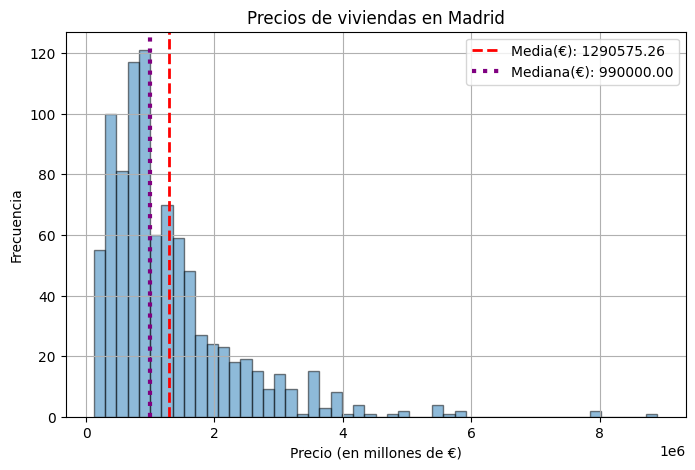

In [9]:
# Histograma utilizando la librería MatplotLib
plt.figure(figsize=(8, 5))
plt.hist(precios, bins=50, edgecolor='k', alpha=0.5)
plt.title("Precios de viviendas en Madrid")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Frecuencia")
plt.axvline(media_precios, color='red', linestyle='dashed', linewidth=2, label=f'Media(€): {media_precios:.2f}')
plt.axvline(mediana_precios, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(€): {mediana_precios:.2f}')
plt.legend()
plt.grid()
plt.show()

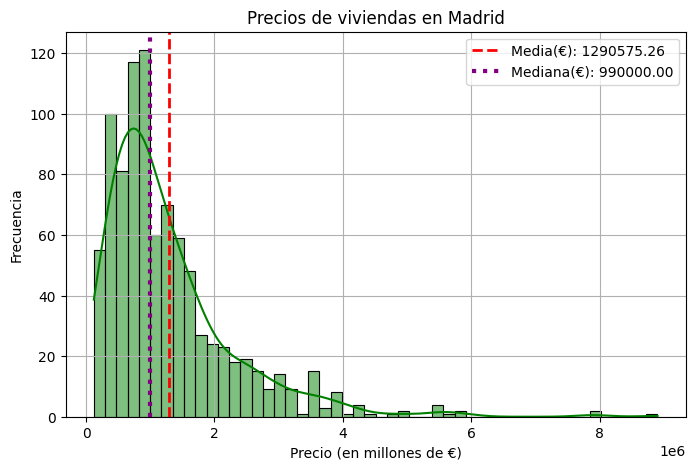

In [10]:
# Histograma y Curva de Densidad utilizando la librería Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(precios, bins=50, kde=True, color="green", edgecolor="black")
plt.title("Precios de viviendas en Madrid")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Frecuencia")
plt.axvline(media_precios, color='red', linestyle='dashed', linewidth=2, label=f'Media(€): {media_precios:.2f}')
plt.axvline(mediana_precios, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(€): {mediana_precios:.2f}')
plt.legend()
plt.grid()
plt.show()


<p>Tal y como se puede apreciar en la gráfica superior, los precios de las viviendas en venta en Madrid tienen una distribución claramente asimétrica, con una larga cola de distribución prolongada hacia la derecha. La mayoría de las viviendas en venta se concentran en un rango relativamente bajo de precios.
<p>Sin embargo, existen también un notable número de viviendas en venta con precios significativamente más altos. Este hecho provoca que la media de precios sea un tanto "artificial", condicionada por los valores atípicamente altos de un cierto número, reducido pero importante, de viviendas con precios muy altos. Es por ello, que más que la media de precios lo que puede ser más representativo de esta distribución es la mediana, ya que su valor no se ve afectado por los valores atípicos de las viviendas con precios acusadamente más altos. Esta mediana nos indica que el 50% de las viviendas en venta en Madrid, están en venta por menos de 990.000€.

#### 2.3.2-Nº DE BAÑOS.

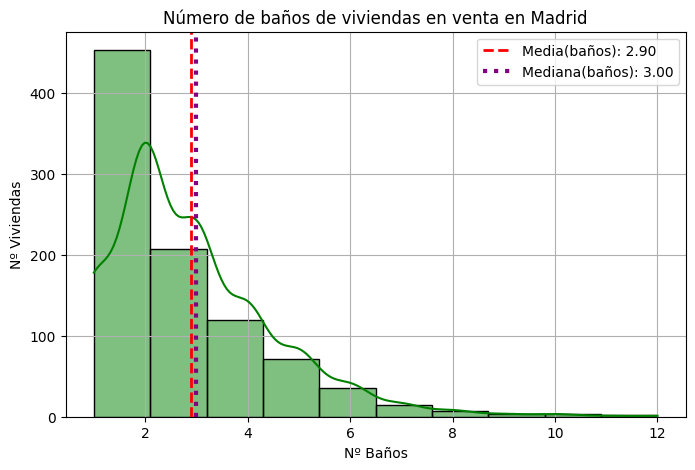

In [11]:
# Histograma y Curva de Densidad utilizando la librería Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(num_banos, bins=10, kde=True, color="green", edgecolor="black")
plt.title("Número de baños de viviendas en venta en Madrid")
plt.xlabel("Nº Baños")
plt.ylabel("Nº Viviendas")
plt.axvline(media_banos, color='red', linestyle='dashed', linewidth=2, label=f'Media(baños): {media_banos:.2f}')
plt.axvline(mediana_banos, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(baños): {mediana_banos:.2f}')
plt.legend()
plt.grid()
plt.show()

<p> Esta gráfica, al igual que lo que sucede con la gráfica anterior de la distribución de precios, muestra que la distribución del número de baños de las viviendas en venta en Madrid presenta, igualmente, una distribuciión asimétrica. No obstante, en esta ocasión y diferencia de la gráfica anterior, larga cola hacia la derecha es más progresiva. 
<p> También hay presentes valores atípicos en los que un reducido número de viviendas tiene un número de baños acusadamente altos. Lo cual provoca la asimetría de la distribución y que la media se acerce mucho a la mediana.
<p> De la mediana se deduce que el 50% de las viviendas en venta tiene hasta 3 baños. El resto de las viviendas se reparte de forma progresiva en las escalas superiores del número de baños, sin que haya un número claramente predominante como en el caso del primer 50% de casos de la distribución.

#### 2.3.3-Nº DE HABITACIONES.

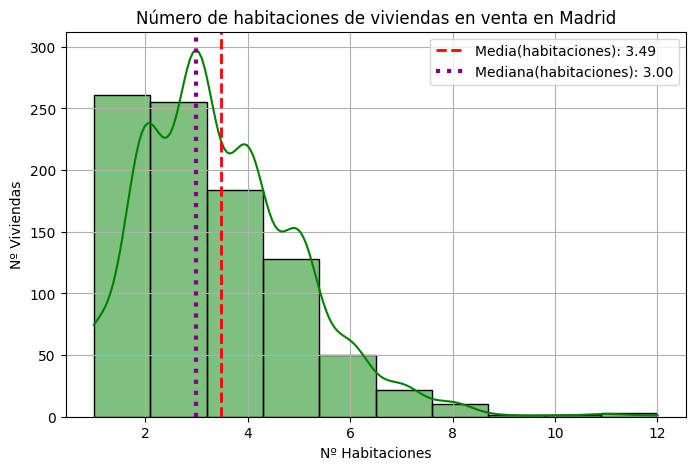

In [12]:
# Histograma y Curva de Densidad utilizando la librería Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(num_habitaciones, bins=10, kde=True, color="green", edgecolor="black")
plt.title("Número de habitaciones de viviendas en venta en Madrid")
plt.xlabel("Nº Habitaciones")
plt.ylabel("Nº Viviendas")
plt.axvline(media_habitaciones, color='red', linestyle='dashed', linewidth=2, label=f'Media(habitaciones): {media_habitaciones:.2f}')
plt.axvline(mediana_habitaciones, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(habitaciones): {mediana_habitaciones:.2f}')
plt.legend()
plt.grid()
plt.show()

<p> En este caso, también se presenta una distribución asimétrica, con una larga cola hacia la derecha (sesgo positivo). Esto también denota que existen algunas viviendas con un número de habitaciones atípicamente alto, lo que provoca que la media se acerce a la mediana de la distribución.
<p> La mediana, con un valor de 3 habitaciones, nos indica que el 50% de las viviendas en venta tienen hasta 3 habitaciones. El resto, viendo la cola de la distribución, no presenta un claro valor predominante.

#### 2.3.4-SUPERFICIES.

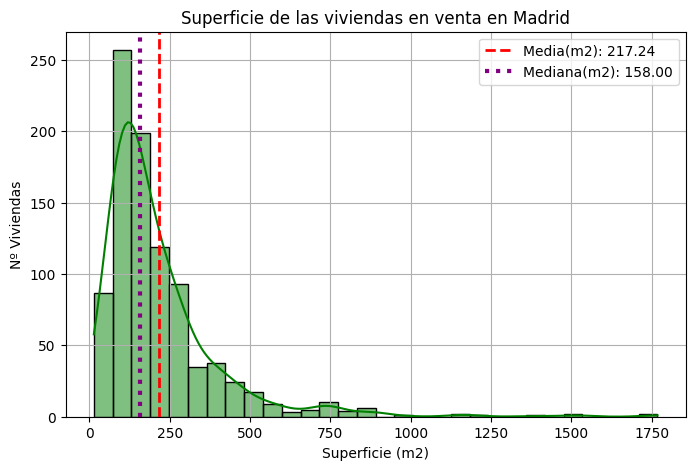

In [13]:
# Histograma y Curva de Densidad utilizando la librería Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(superficie, bins=30, kde=True, color="green", edgecolor="black")
plt.title("Superficie de las viviendas en venta en Madrid")
plt.xlabel("Superficie (m2)")
plt.ylabel("Nº Viviendas")
plt.axvline(media_superficie, color='red', linestyle='dashed', linewidth=2, label=f'Media(m2): {media_superficie:.2f}')
plt.axvline(mediana_superficie, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(m2): {mediana_superficie:.2f}')
plt.legend()
plt.grid()
plt.show()

<p> En esta gráfica, también se aprecia una clara distribución asimétrica con una muy larga cola hacia la derecha (sesgo positivo), representando la presencia de valores claramente atípicos con superficies excepcionalmente altas. Este hecho provoca que la media sea sensiblemente mayor que la mediana.
<p> En esta ocasión, la mediana indica que el 50% de las viviendas en venta en Madrid tiene menos de 158 m2 de superficie.

#### 2.3.5-BARRIOS.

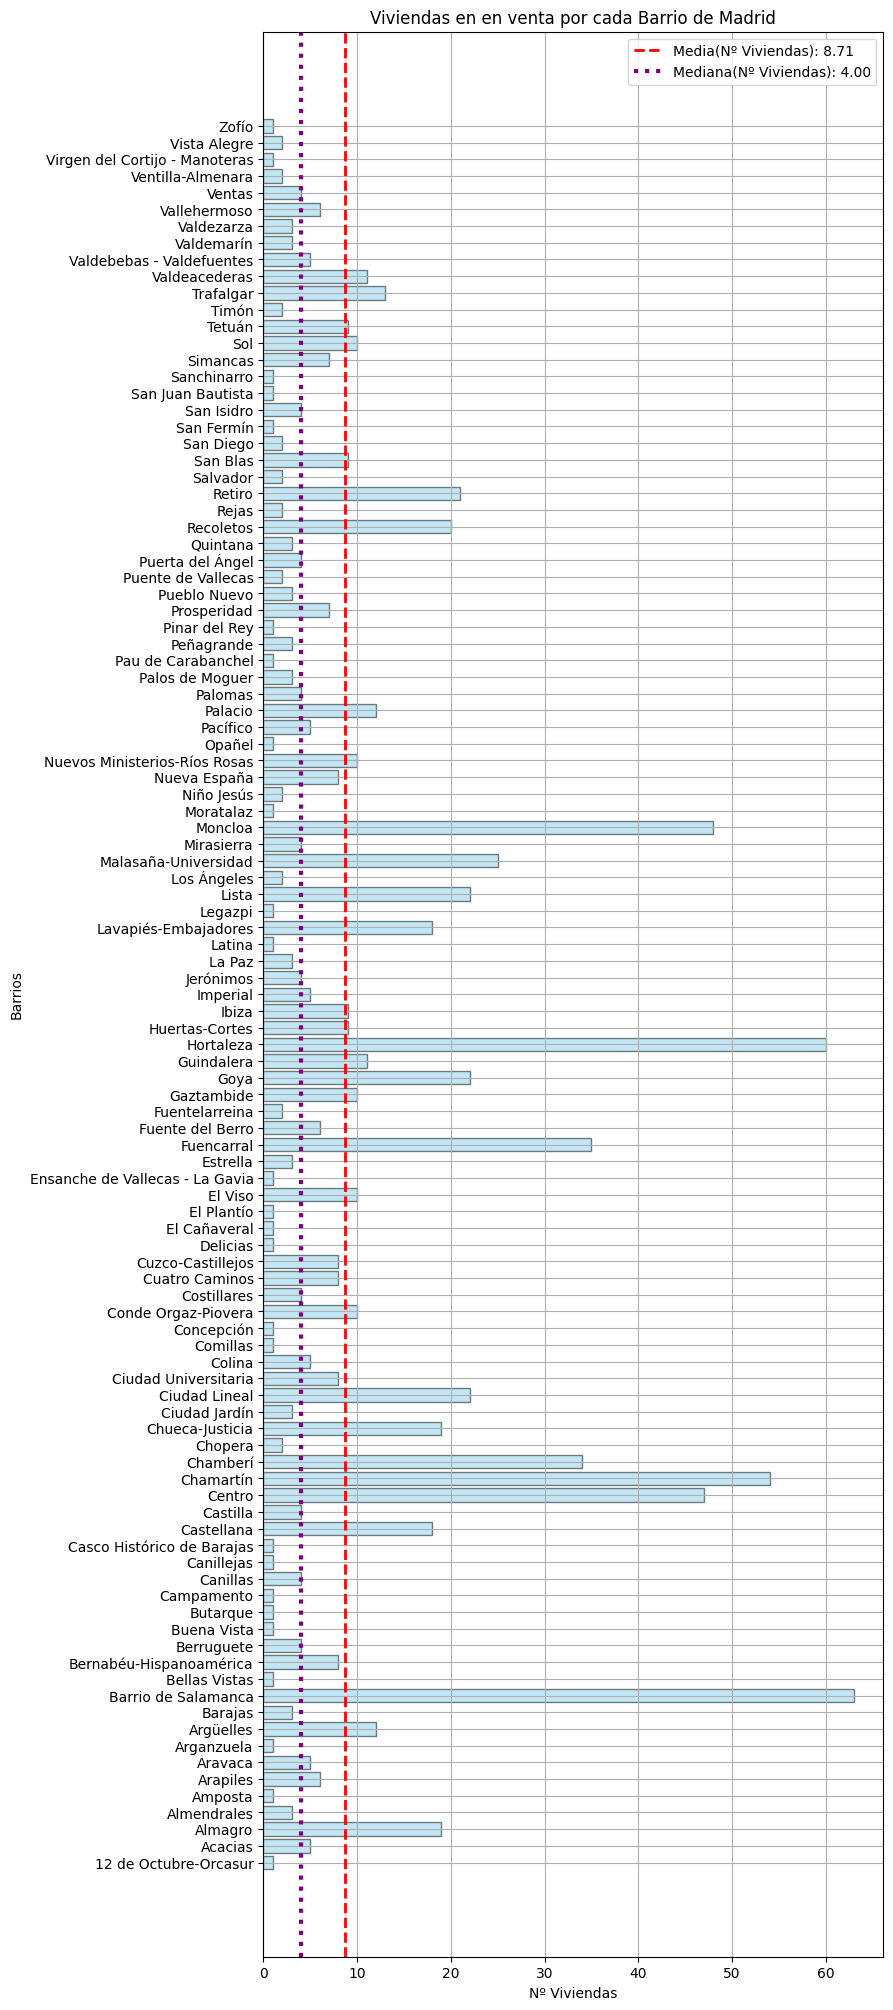

In [14]:
# Barrios, al tratarse de variables cualitativas, se emplean gráficos de barras utilizando la librería MatplotLib
plt.figure(figsize=(8, 25))
plt.barh(barrios_unicos, frecuencias_barrios_unicos, color='skyblue', edgecolor='k', alpha=0.5)
plt.title("Viviendas en en venta por cada Barrio de Madrid")
plt.xlabel("Nº Viviendas")
plt.ylabel("Barrios")
plt.axvline(media_fre_barrios_unicos, color='red', linestyle='dashed', linewidth=2, label=f'Media(Nº Viviendas): {media_fre_barrios_unicos:.2f}')
plt.axvline(mediana_barrios, color='purple', linestyle="dotted", linewidth=3, label=f'Mediana(Nº Viviendas): {mediana_barrios:.2f}')
plt.legend()
plt.grid()
plt.show()

<p> En esta distribución por barrios, se puede apreciar claramente que hay un nutrido número de barrios con un número de viviendas en venta por encima de la media. Tales barrios son: Salamanca, Hortaleza, Chamartín, Moncloa, Centro, etc.
<p> La media del número de viviendas en venta por barrio es considerablemente superior a la mediana

### 2.4-MEDIDAS DE POSICIÓN NO CENTRAL: CUARTILES

#### 2.4.1-CUARTILES

<p> En las siguientes gráficas de caja, se puede observar lo descrito anteriormente en los diferentes puntos del apartado 2.3. Esto es: zona donde se concentra el 50% de la muestra estudiada, la media y mediana, los límites inferior y superior y los valores atípicos.

##### 2.4.1.1-PRECIOS

El valor del cuartil 25% de los precios de las viviendas en venta es: 625000.00€
El valor del cuartil 50% de los precios de las viviendas en venta es: 990000.00€
El valor del cuartil 75% de los precios de las viviendas en venta es: 1650000.00€


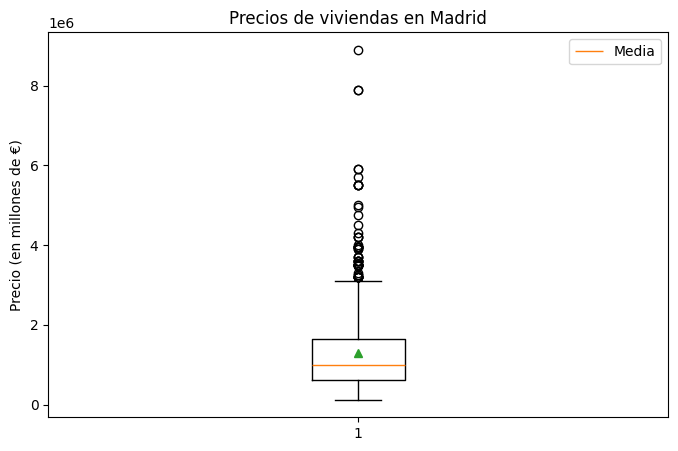

In [15]:
# Aunque los cuartiles se van a calcular de forma unitaria, también se pueden obtener los cuartiles de una vez, como elementos de un array. Por ejemplo:
# cuartiles = np.quantile(a = precios, q = [0.25, 0.50, 0.75], interpolation = "lower")
# La línea de código de más arriba obtiene una array cuyos elementos son los valores de los cuartiles 25%, 50% y 75%)

# En este estudio, se van a calcular los cuartiles por separado.
q1_precios = np.quantile(a = precios, q = 0.25, interpolation = "lower")
q2_precios = mediana_precios
q3_precios = np.quantile(a = precios, q = 0.75, interpolation = "lower")

print(f"El valor del cuartil 25% de los precios de las viviendas en venta es: {q1_precios:.2f}€")
print(f"El valor del cuartil 50% de los precios de las viviendas en venta es: {q2_precios:.2f}€")
print(f"El valor del cuartil 75% de los precios de las viviendas en venta es: {q3_precios:.2f}€")

plt.figure(figsize=(8,5))
plt.boxplot(precios, showmeans=True, label="Media")
plt.title("Precios de viviendas en Madrid")
plt.ylabel("Precio (en millones de €)")
plt.legend()
plt.show()


##### 2.4.1.2-Nº DE BAÑOS

El valor del cuartil 25% del número de baños de las viviendas en venta es: 2.00
El valor del cuartil 50% del número de baños de las viviendas en venta es: 3.00
El valor del cuartil 75% del número de baños de las viviendas en venta es: 4.00


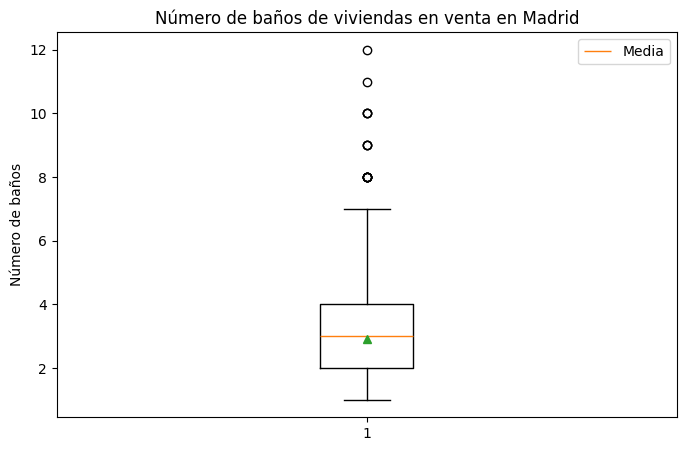

In [16]:
q1_banos = np.quantile(a = num_banos, q = 0.25, interpolation = "lower")
q2_banos = mediana_banos
q3_banos = np.quantile(a = num_banos, q = 0.75, interpolation = "lower")

print(f"El valor del cuartil 25% del número de baños de las viviendas en venta es: {q1_banos:.2f}")
print(f"El valor del cuartil 50% del número de baños de las viviendas en venta es: {q2_banos:.2f}")
print(f"El valor del cuartil 75% del número de baños de las viviendas en venta es: {q3_banos:.2f}")

plt.figure(figsize=(8,5))
plt.boxplot(num_banos, showmeans=True, label="Media")
plt.title("Número de baños de viviendas en venta en Madrid")
plt.ylabel("Número de baños")
plt.legend()
plt.show()

##### 2.4.1.3-Nº DE HABITACIONES

El valor del cuartil 25% del número de habitaciones de las viviendas en venta es: 2.00
El valor del cuartil 50% del número de habitaciones de las viviendas en venta es: 3.00
El valor del cuartil 75% del número de habitaciones de las viviendas en venta es: 4.00


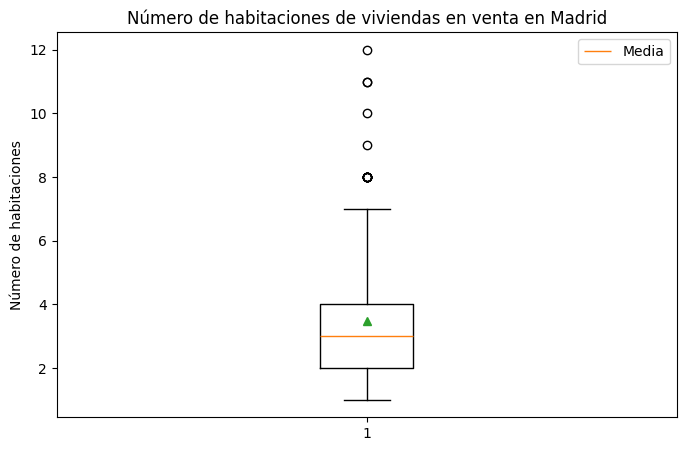

In [17]:
q1_habitaciones = np.quantile(a = num_habitaciones, q = 0.25, interpolation = "lower")
q2_habitaciones = mediana_habitaciones
q3_habitaciones = np.quantile(a = num_habitaciones, q = 0.75, interpolation = "lower")

print(f"El valor del cuartil 25% del número de habitaciones de las viviendas en venta es: {q1_habitaciones:.2f}")
print(f"El valor del cuartil 50% del número de habitaciones de las viviendas en venta es: {q2_habitaciones:.2f}")
print(f"El valor del cuartil 75% del número de habitaciones de las viviendas en venta es: {q3_habitaciones:.2f}")

plt.figure(figsize=(8,5))
plt.boxplot(num_habitaciones, showmeans=True, label="Media")
plt.title("Número de habitaciones de viviendas en venta en Madrid")
plt.ylabel("Número de habitaciones")
plt.legend()
plt.show()

##### 2.4.1.4-SUPERFICIE

El valor del cuartil 25% de la superficie de las viviendas en venta es: 104.00 m2
El valor del cuartil 50% de la superficie de las viviendas en venta es: 158.00 m2
El valor del cuartil 75% de la superficie de las viviendas en venta es: 264.00 m2


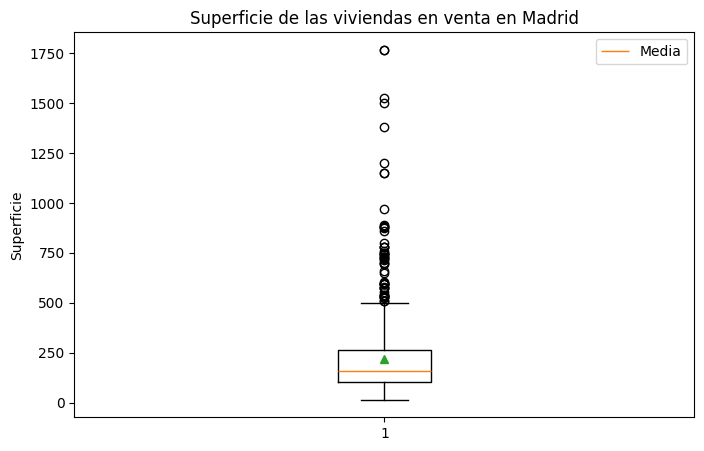

In [18]:
q1_superficie = np.quantile(a = superficie, q = 0.25, interpolation = "lower")
q2_superficie = mediana_superficie
q3_superficie = np.quantile(a = superficie, q = 0.75, interpolation = "lower")

print(f"El valor del cuartil 25% de la superficie de las viviendas en venta es: {q1_superficie:.2f} m2")
print(f"El valor del cuartil 50% de la superficie de las viviendas en venta es: {q2_superficie:.2f} m2")
print(f"El valor del cuartil 75% de la superficie de las viviendas en venta es: {q3_superficie:.2f} m2")

plt.figure(figsize=(8,5))
plt.boxplot(superficie, showmeans=True, label="Media")
plt.title("Superficie de las viviendas en venta en Madrid")
plt.ylabel("Superficie")
plt.legend()
plt.show()

##### 2.4.1.5-BARRIOS

El valor del cuartil 25% de los barrios con viviendas en venta es: 2.00
El valor del cuartil 50% de los barrios con viviendas en venta es: 4.00
El valor del cuartil 75% de los barrios con viviendas en venta es: 10.00


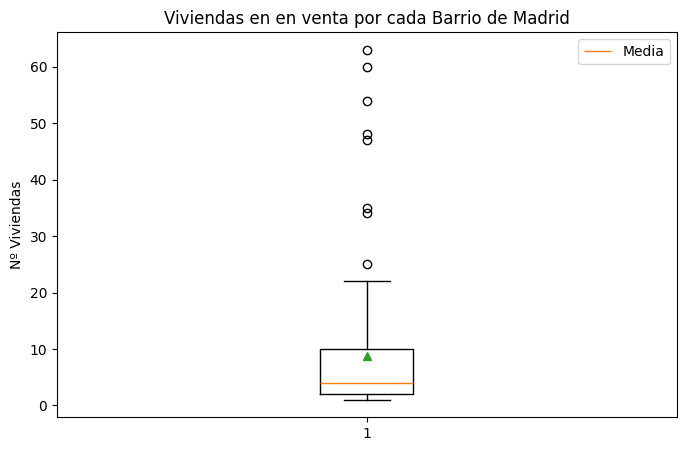

In [19]:
q1_barrios = np.quantile(a = frecuencias_barrios_unicos, q = 0.25, interpolation = "lower")
q2_barrios = mediana_barrios
q3_barrios = np.quantile(a = frecuencias_barrios_unicos, q = 0.75, interpolation = "lower")

print(f"El valor del cuartil 25% de los barrios con viviendas en venta es: {q1_barrios:.2f}")
print(f"El valor del cuartil 50% de los barrios con viviendas en venta es: {q2_barrios:.2f}")
print(f"El valor del cuartil 75% de los barrios con viviendas en venta es: {q3_barrios:.2f}")

plt.figure(figsize=(8,5))
plt.boxplot(frecuencias_barrios_unicos, showmeans=True, label="Media")
plt.title("Viviendas en en venta por cada Barrio de Madrid")
plt.ylabel("Nº Viviendas")
plt.legend()
plt.show()

### 2.5-MEDIDAS DE DISPERSIÓN: RANGO, RANGO INTERCUARTIL (IQR), VARIANZA Y DESVIACIÓN ESTÁNDAR

#### 2.5.1-RANGO

In [20]:
rango_precios = max_precios - min_precios
rango_banos = max_banos - min_banos
rango_habitaciones = max_habitaciones - min_habitaciones
rango_superficie = max_superficie - min_superficie
rango_barrios = max_barrios - min_barrios

print(f"El valor rango de los precios de las viviendas en venta es: {rango_precios:.2f}€")
print(f"El valor rango del número de baños de las viviendas en venta es: {rango_banos:.2f}")
print(f"El valor rango del número de habitaciones de las viviendas en venta es: {rango_habitaciones:.2f}")
print(f"El valor rango de la superficies de las viviendas en venta es: {rango_superficie:.2f} m2")
print(f"El valor rango de las viviendas en venta por barrios es: {rango_barrios:.2f}")

El valor rango de los precios de las viviendas en venta es: 8778000.00€
El valor rango del número de baños de las viviendas en venta es: 11.00
El valor rango del número de habitaciones de las viviendas en venta es: 11.00
El valor rango de la superficies de las viviendas en venta es: 1754.00 m2
El valor rango de las viviendas en venta por barrios es: 62.00


#### 2.5.2-RANGO INTERCUARTÍLICO (IQR)

In [21]:
iqr_precios = q3_precios - q1_precios
iqr_banos = q3_banos - q1_banos
iqr_habitaciones = q3_habitaciones - q1_habitaciones
iqr_superficie = q3_superficie - q1_superficie
iqr_barrios = q3_barrios - q1_barrios

print(f"El valor IQR de los precios de las viviendas en venta es: {iqr_precios:.2f}€")
print(f"El valor IQR del número de baños de las viviendas en venta es: {iqr_banos:.2f}")
print(f"El valor IQR del número de habitaciones de las viviendas en venta es: {iqr_habitaciones:.2f}")
print(f"El valor IQR de la superficies de las viviendas en venta es: {iqr_superficie:.2f} m2")
print(f"El valor IQR de las viviendas en venta por barrios es: {iqr_barrios:.2f}")

El valor IQR de los precios de las viviendas en venta es: 1025000.00€
El valor IQR del número de baños de las viviendas en venta es: 2.00
El valor IQR del número de habitaciones de las viviendas en venta es: 2.00
El valor IQR de la superficies de las viviendas en venta es: 160.00 m2
El valor IQR de las viviendas en venta por barrios es: 8.00


#### 2.5.3-VARIANZA

In [22]:
var_precios = np.var(precios)
var_banos = np.var(num_banos)
var_habitaciones = np.var(num_habitaciones)
var_superficie = np.var(superficie)
var_barrios = np.var(frecuencias_barrios_unicos)

print(f"La varianza de los precios de las viviendas en venta es: {var_precios:.2f}€")
print(f"La varianza del número de baños de las viviendas en venta es: {var_banos:.2f}")
print(f"La varianza del número de habitaciones de las viviendas en venta es: {var_habitaciones:.2f}")
print(f"La varianza de la superficies de las viviendas en venta es: {var_superficie:.2f} m2")
print(f"La varianza de las viviendas en venta por barrios es: {var_barrios:.2f}")

La varianza de los precios de las viviendas en venta es: 1073448095137.26€
La varianza del número de baños de las viviendas en venta es: 2.64
La varianza del número de habitaciones de las viviendas en venta es: 2.47
La varianza de la superficies de las viviendas en venta es: 36726.28 m2
La varianza de las viviendas en venta por barrios es: 154.49


#### 2.5.4-DESVIACIÓN ESTÁNDAR

In [23]:
desv_precios = np.std(precios)
desv_banos = np.std(num_banos)
desv_habitaciones = np.std(num_habitaciones)
desv_superficie = np.std(superficie)
desv_barrios = np.std(frecuencias_barrios_unicos)

print(f"La desviación estándar de los precios de las viviendas en venta es: {desv_precios:.2f}€")
print(f"La desviación estándar del número de baños de las viviendas en venta es: {desv_banos:.2f}")
print(f"La desviación estándar del número de habitaciones de las viviendas en venta es: {desv_habitaciones:.2f}")
print(f"La desviación estándar de la superficies de las viviendas en venta es: {desv_superficie:.2f} m2")
print(f"La desviación estándar de las viviendas en venta por barrios es: {desv_barrios:.2f}")

La desviación estándar de los precios de las viviendas en venta es: 1036073.40€
La desviación estándar del número de baños de las viviendas en venta es: 1.63
La desviación estándar del número de habitaciones de las viviendas en venta es: 1.57
La desviación estándar de la superficies de las viviendas en venta es: 191.64 m2
La desviación estándar de las viviendas en venta por barrios es: 12.43


#### 2.5.5-FILTRADO DE DATOS

##### 2.5.5.1-PRECIO MÁXIMO DEL 20% DE LAS VIVIENDAS MÁS BARATAS

In [24]:
# Filtrado de resultados empleando los percentiles.
precio_percentil_20 = np.percentile(precios, 20)
print(f"El 20% de las viviendas más baratas en venta en Madrid, cuestan menos de: {precio_percentil_20:.2f}€")
viviendas_mas_baratas = precios[precios <= precio_percentil_20]
media_viviendas_mas_baratas = np.mean(viviendas_mas_baratas)
print(f"El precio medio del 20% de las viviendas más baratas en venta en Madrid es: {media_viviendas_mas_baratas:.2f}€")

El 20% de las viviendas más baratas en venta en Madrid, cuestan menos de: 529900.00€
El precio medio del 20% de las viviendas más baratas en venta en Madrid es: 350706.89€


##### 2.5.5.2-PRECIO MÍNIMO DEL 20% DE LAS VIVIENDAS MÁS CARAS

In [25]:
# Filtrado de resultados empleando los percentiles.
precio_percentil_80 = np.percentile(precios, 80)
print(f"El 20% de las viviendas más caras en venta en Madrid, cuestan más de: {precio_percentil_80:.2f}€")
viviendas_mas_caras = precios[precios >= precio_percentil_80]
media_viviendas_mas_caras = np.mean(viviendas_mas_caras)
print(f"El precio medio del 20% de las viviendas más caras en venta en Madrid es: {media_viviendas_mas_caras:.2f}€")

El 20% de las viviendas más caras en venta en Madrid, cuestan más de: 1850000.00€
El precio medio del 20% de las viviendas más caras en venta en Madrid es: 2915162.16€


##### 2.5.5.3-LOS BARRIOS DONDE SE ENCUENTRAN EL 20% DE LAS VIVIENDAS EN VENTA MÁS BARATAS DE MADRID

In [26]:
# Se ordena el array de precios, de menor a mayor. Devuelve un array cuyos elementos son índices del array "precios".
index_precios_asc = np.argsort(precios)


# Se calcula la cantidad de filas que representa el 20% del total de filas de la muestra
filas_percentil_20 = int(len(precios) * 0.2)

# Utilizando el nº de filas que representa el 20% de la muestra y el array de índices obtenido más arriba, se obtiene un subconjunto de los barrios correspondientes asociados al 20% de las viviendas más baratas.
barrios_baratos_percentil_20 = barrios[index_precios_asc[:filas_percentil_20]]

# Como en el array barrios_baratos_percentil_20 puede contener elementos (barrios) repetidos, se obtienen los barrios únicos y su frecuencia correspondiente.
barrios_baratos_unicos_percentil_20, frecuencias_barrios_baratos_unicos_percentil_20 = np.unique(barrios_baratos_percentil_20, return_counts=True)

# Se recorren ambos arrays y se presentan los resultados.
print("Estos son los barrios en donde se encuentran el 20% de las viviendas más baratas de Madrid:")
for barrios_mas_baratos_percentil_20, viviendas_barrios_mas_baratos_percentil_20 in zip(barrios_baratos_unicos_percentil_20, frecuencias_barrios_baratos_unicos_percentil_20):
    print(f"{barrios_mas_baratos_percentil_20}: {viviendas_barrios_mas_baratos_percentil_20} vivienda/s en venta.")

# Se indica la moda de los barrios más baratos y el nombre del barrio de moda.
index_barrios_unicos_percentil_20, moda_barrios_unicos_percentil_20 = stats.mode(frecuencias_barrios_baratos_unicos_percentil_20)
print(f"La moda de los barrios con el 20% de las viviendas en venta más baratas en Madrid es: {moda_barrios_unicos_percentil_20}")
print(f"El barrio de moda entre el 20% de las viviendas más baratas en venta de Madrid es: {barrios_baratos_percentil_20[index_barrios_unicos_percentil_20]}")




Estos son los barrios en donde se encuentran el 20% de las viviendas más baratas de Madrid:
12 de Octubre-Orcasur: 1 vivienda/s en venta.
Acacias: 3 vivienda/s en venta.
Almendrales: 2 vivienda/s en venta.
Amposta: 1 vivienda/s en venta.
Arapiles: 2 vivienda/s en venta.
Argüelles: 3 vivienda/s en venta.
Barajas: 2 vivienda/s en venta.
Bellas Vistas: 1 vivienda/s en venta.
Berruguete: 4 vivienda/s en venta.
Buena Vista: 1 vivienda/s en venta.
Butarque: 1 vivienda/s en venta.
Campamento: 1 vivienda/s en venta.
Canillas: 2 vivienda/s en venta.
Casco Histórico de Barajas: 1 vivienda/s en venta.
Castellana: 1 vivienda/s en venta.
Castilla: 1 vivienda/s en venta.
Centro: 8 vivienda/s en venta.
Chamartín: 4 vivienda/s en venta.
Chamberí: 2 vivienda/s en venta.
Chopera: 2 vivienda/s en venta.
Chueca-Justicia: 5 vivienda/s en venta.
Ciudad Jardín: 1 vivienda/s en venta.
Ciudad Lineal: 3 vivienda/s en venta.
Ciudad Universitaria: 1 vivienda/s en venta.
Colina: 2 vivienda/s en venta.
Comillas: 1 

##### 2.5.5.4-LOS BARRIOS DONDE SE ENCUENTRAN EL 20% DE LAS VIVIENDAS EN VENTA MÁS CARAS DE MADRID

In [27]:
# Se ordena el array de precios, de mayor a menor. Devuelve un array cuyos elementos son índices del array "precios".
index_precios_desc = np.argsort(precios)[::-1]

# Se calcula la cantidad de filas que representa el 20% del total de filas de la muestra. Ahora, la lista está ordenada de mayor a menor precio
filas_percentil_80 = int(len(precios) * 0.2)

# Utilizando el nº de filas que representa el 20% de la muestra y el array de índices obtenido más arriba, se obtiene un subconjunto de los barrios correspondientes asociados al 20% de las viviendas más baratas.
barrios_caros_percentil_80 = barrios[index_precios_desc[:filas_percentil_80]]

# Como en el array barrios_caros_percentil_20 puede contener elementos (barrios) repetidos, se obtienen los barrios únicos y su frecuencia correspondiente.
barrios_caros_unicos_percentil_80, frecuencias_barrios_caros_unicos_percentil_80 = np.unique(barrios_caros_percentil_80, return_counts=True)

# Se recorren ambos arrays y se presentan los resultados.
print("Estos son los barrios en donde se encuentran el 20% de las viviendas más caras de Madrid:")
for barrios_mas_caros_percentil_80, viviendas_barrios_mas_caros_percentil_80 in zip(barrios_caros_unicos_percentil_80, frecuencias_barrios_caros_unicos_percentil_80):
    print(f"{barrios_mas_caros_percentil_80}: {viviendas_barrios_mas_caros_percentil_80} vivienda/s en venta.")

# Se indica la moda de los barrios más caros y el nombre del barrio de moda.
index_barrios_unicos_percentil_80, moda_barrios_unicos_percentil_80 = stats.mode(frecuencias_barrios_caros_unicos_percentil_80)
print(f"La moda de los barrios con el 20% de las viviendas en venta más caras en Madrid es: {moda_barrios_unicos_percentil_80}")
print(f"El barrio de moda entre el 20% de las viviendas más caras en venta de Madrid es: {barrios_caros_unicos_percentil_80[index_barrios_unicos_percentil_80]}")


Estos son los barrios en donde se encuentran el 20% de las viviendas más caras de Madrid:
Almagro: 13 vivienda/s en venta.
Arapiles: 1 vivienda/s en venta.
Aravaca: 1 vivienda/s en venta.
Argüelles: 1 vivienda/s en venta.
Barrio de Salamanca: 20 vivienda/s en venta.
Bernabéu-Hispanoamérica: 2 vivienda/s en venta.
Canillas: 2 vivienda/s en venta.
Canillejas: 1 vivienda/s en venta.
Castellana: 7 vivienda/s en venta.
Centro: 6 vivienda/s en venta.
Chamartín: 19 vivienda/s en venta.
Chamberí: 11 vivienda/s en venta.
Chueca-Justicia: 3 vivienda/s en venta.
Ciudad Jardín: 2 vivienda/s en venta.
Ciudad Universitaria: 3 vivienda/s en venta.
Conde Orgaz-Piovera: 5 vivienda/s en venta.
Cuzco-Castillejos: 2 vivienda/s en venta.
El Viso: 6 vivienda/s en venta.
Fuencarral: 8 vivienda/s en venta.
Goya: 3 vivienda/s en venta.
Hortaleza: 19 vivienda/s en venta.
Jerónimos: 1 vivienda/s en venta.
Lista: 2 vivienda/s en venta.
Malasaña-Universidad: 1 vivienda/s en venta.
Mirasierra: 2 vivienda/s en venta

## 3.-ANÁLISIS INFERENCIAL.

### 3.1-FILTRADO DE OUTLIERS

#### 3.1.1-FILTRADO DE OUTLIERS: PUNTUACIÓN Z (Z-SCORE)

In [28]:
# Creamos una Función, en Python, que implementa el método de Puntuación Z (Z-Score). Dado un array de NumPy y un valor z determinado (por defecto, z = 3) la función nos devuelve una tupla, cuyos elementos son: un array de NumPy SIN valores atípicos (sin outliers) y otro array sólo CON los valores atípicos.
def filtrar_outliers_z_score(array, z = 3):
    # Se calcula la media y la desviación estándar
    Q1 = np.percentile(array, 25)
    media = np.mean(array)
    std = np.std(array)
        
     # Se calculan los límites laterales (𝜇 ± z*𝜎)
    limite_inferior = media - z * std
    limite_superior = media + z * std
    
     # Filtramos los elementos del array, los que esten fuera de los limites laterales.
    outliers = [elem for elem in array if elem < limite_inferior or elem > limite_superior]
    
    # Filtramos los elementos del array, los que no pertenezcan a outliers.
    datos_sin_outliers = [elem for elem in array if elem not in outliers]
    
    # Retornamos ambos arrays, uno con los datos sin outliers, otro con los outliers.
    return np.array(datos_sin_outliers), np.array(outliers)

##### 3.1.1.1-FILTRADO Z-SCORE: PRECIOS

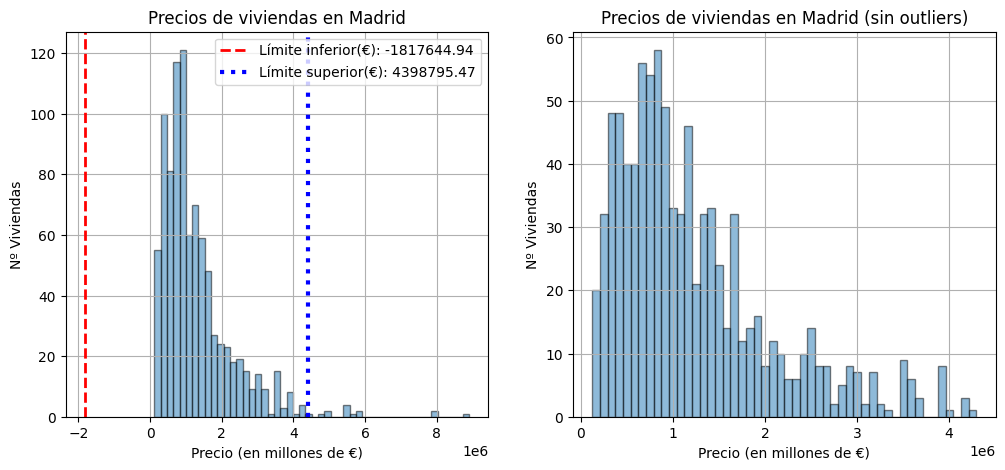

In [29]:
z = 3
precios_sin_outliers_z_score, _ = filtrar_outliers_z_score(precios, z)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
plt.hist(precios, bins=50, edgecolor='k', alpha=0.5)
plt.title("Precios de viviendas en Madrid")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Nº Viviendas")
plt.axvline((media_precios - z * desv_precios), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(€): {(media_precios - z * desv_precios):.2f}')
plt.axvline((media_precios + z * desv_precios), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(€): {(media_precios + z * desv_precios):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(precios_sin_outliers_z_score, bins=50, edgecolor='k', alpha=0.5)
plt.title("Precios de viviendas en Madrid (sin outliers)")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.1.2-FILTRADO Z-SCORE: Nº DE BAÑOS.

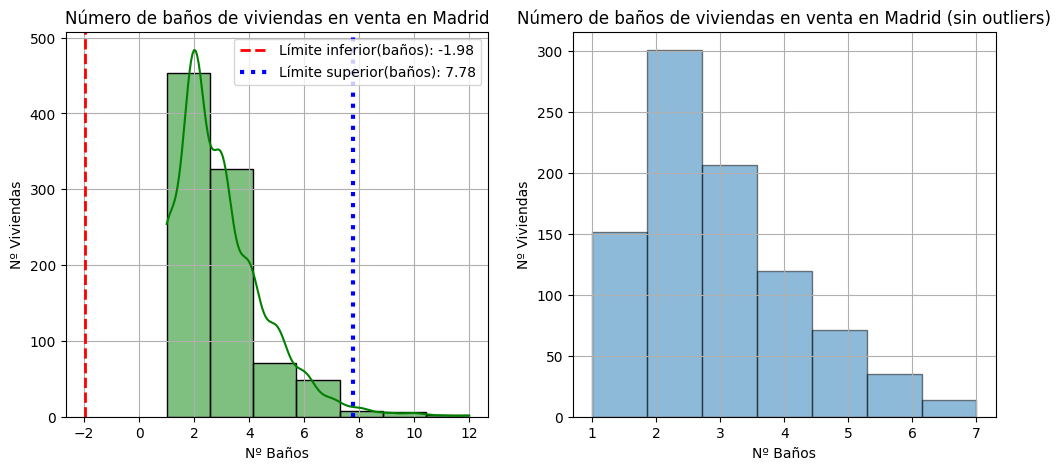

In [30]:
z = 3
banos_sin_outliers_z_score, _ = filtrar_outliers_z_score(num_banos, z)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(num_banos, bins=7, kde=True, color="green", edgecolor="black")
plt.title("Número de baños de viviendas en venta en Madrid")
plt.xlabel("Nº Baños")
plt.ylabel("Nº Viviendas")
plt.axvline((media_banos - z * desv_banos), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(baños): {(media_banos - z * desv_banos):.2f}')
plt.axvline((media_banos + z * desv_banos), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(baños): {(media_banos + z * desv_banos):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(banos_sin_outliers_z_score, bins=7, edgecolor='k', alpha=0.5)
plt.title("Número de baños de viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Nº Baños")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.1.3-FILTRADO Z-SCORE: Nº DE HABITACIONES

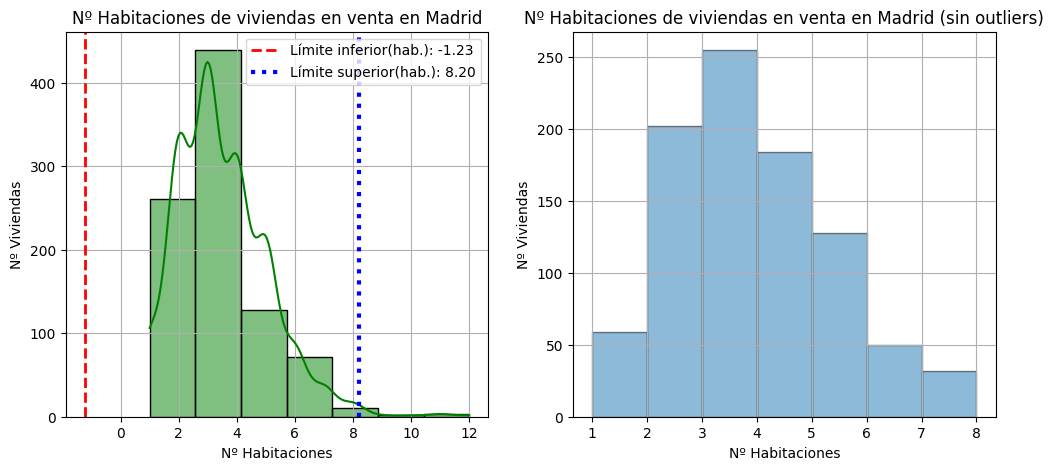

In [31]:
z = 3
habitaciones_sin_outliers_z_score, _ = filtrar_outliers_z_score(num_habitaciones, z)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(num_habitaciones, bins=7, kde=True, color="green", edgecolor="black")
plt.title("Nº Habitaciones de viviendas en venta en Madrid")
plt.xlabel("Nº Habitaciones")
plt.ylabel("Nº Viviendas")
plt.axvline((media_habitaciones - z * desv_habitaciones), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(hab.): {(media_habitaciones - z * desv_habitaciones):.2f}')
plt.axvline((media_habitaciones + z * desv_habitaciones), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(hab.): {(media_habitaciones + z * desv_habitaciones):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(habitaciones_sin_outliers_z_score, bins=7, edgecolor='k', alpha=0.5)
plt.title("Nº Habitaciones de viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Nº Habitaciones")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.1.4-FILTRADO Z-SCORE: SUPERFICIE

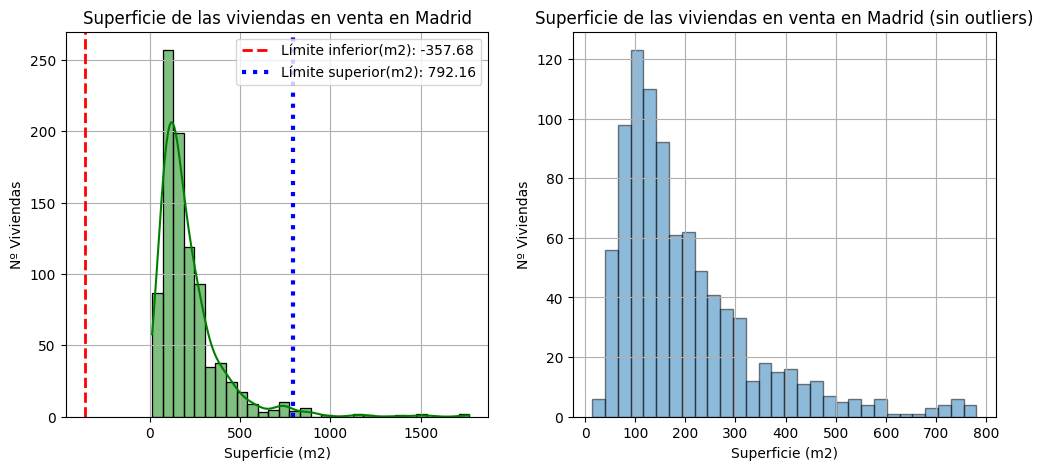

In [32]:
z = 3
superficie_sin_outliers_z_score, _ = filtrar_outliers_z_score(superficie, z)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(superficie, bins=30, kde=True, color="green", edgecolor="black")
plt.title("Superficie de las viviendas en venta en Madrid")
plt.xlabel("Superficie (m2)")
plt.ylabel("Nº Viviendas")
plt.axvline((media_superficie - z * desv_superficie), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(m2): {(media_superficie - z * desv_superficie):.2f}')
plt.axvline((media_superficie + z * desv_superficie), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(m2): {(media_superficie + z * desv_superficie):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(superficie_sin_outliers_z_score, bins=30, edgecolor='k', alpha=0.5)
plt.title("Superficie de las viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Superficie (m2)")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

#### 3.1.2-FILTRADO DE OUTLIERS: LA VALLA DE TUKEY (TUKEY'S FENCE RULE)

In [33]:
# Creamos una Función, en Python, que implementa el método de La Valla de Tukey. Dado un array de NumPy y un valor k determinado (por defecto, k = 1.5) la función nos devuelve un array de NumPy sin valores atípicos (outliers)
def filtrar_outliers_tukey(array, k=1.5):
    # Se calcula Q1
    Q1 = np.percentile(array, 25)
    # Se calcula Q2
    Q3 = np.percentile(array, 75)
    
    # Se calcula IQR
    IQR = Q3 - Q1
    
    # Se calculan los límites superior e inferior: Por defecto, k = 1.5 veces el IQR
    limite_inferior = Q1 - IQR * k
    print(f"Límite inferior: {limite_inferior}")
    limite_superior = Q3 + IQR * k
    print(f"Límite superior: {limite_superior}")
    
    # Se filtra el array original eliminando los valores 1,5 veces el IQR para los límites superior e inferior.
    # Nos quedamos solo con lo que está entre el límitew inferior y el límite superior.
    array_sin_outliers = array[(array >= limite_inferior) & (array <= limite_superior)]
    return array_sin_outliers
    

##### 3.1.2.1-FILTRADO TUKEY: PRECIOS.

Límite inferior: -912500.0
Límite superior: 3187500.0


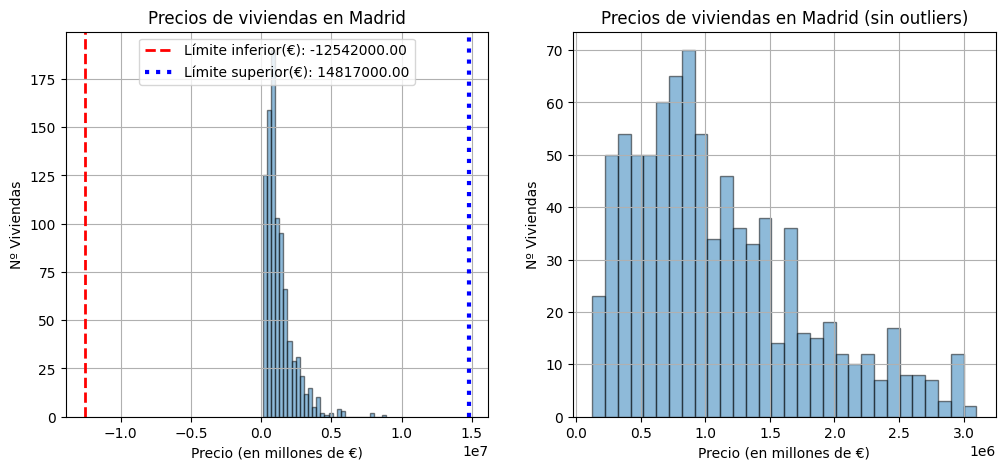

In [34]:
k = 1.5
precios_sin_outliers_tukey = filtrar_outliers_tukey(precios, k)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
plt.hist(precios, bins=30, edgecolor='k', alpha=0.5)
plt.title("Precios de viviendas en Madrid")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Nº Viviendas")
plt.axvline((q1_precios - k * rango_precios), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(€): {(q1_precios - k * rango_precios):.2f}')
plt.axvline((q3_precios + k * rango_precios), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(€): {(q3_precios + k * rango_precios):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(precios_sin_outliers_tukey, bins=30, edgecolor='k', alpha=0.5)
plt.title("Precios de viviendas en Madrid (sin outliers)")
plt.xlabel("Precio (en millones de €)")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.2.2-FILTRADO TUKEY: Nº DE BAÑOS.

Límite inferior: -1.0
Límite superior: 7.0


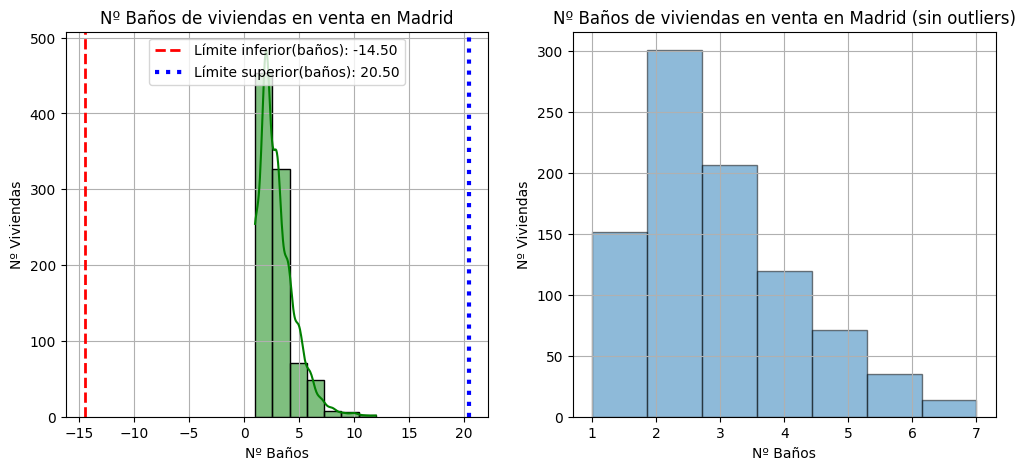

In [35]:
k = 1.5
banos_sin_outliers_tukey = filtrar_outliers_tukey(num_banos, k)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(num_banos, bins=7, kde=True, color="green", edgecolor="black")
plt.title("Nº Baños de viviendas en venta en Madrid")
plt.xlabel("Nº Baños")
plt.ylabel("Nº Viviendas")
plt.axvline((q1_banos - k * rango_banos), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(baños): {(q1_banos - k * rango_banos):.2f}')
plt.axvline((q3_banos + k * rango_banos), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(baños): {(q3_banos + k * rango_banos):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(banos_sin_outliers_tukey, bins=7, edgecolor='k', alpha=0.5)
plt.title("Nº Baños de viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Nº Baños")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.2.3-FILTRADO TUKEY: Nº DE HABITACIONES.

Límite inferior: -1.0
Límite superior: 7.0


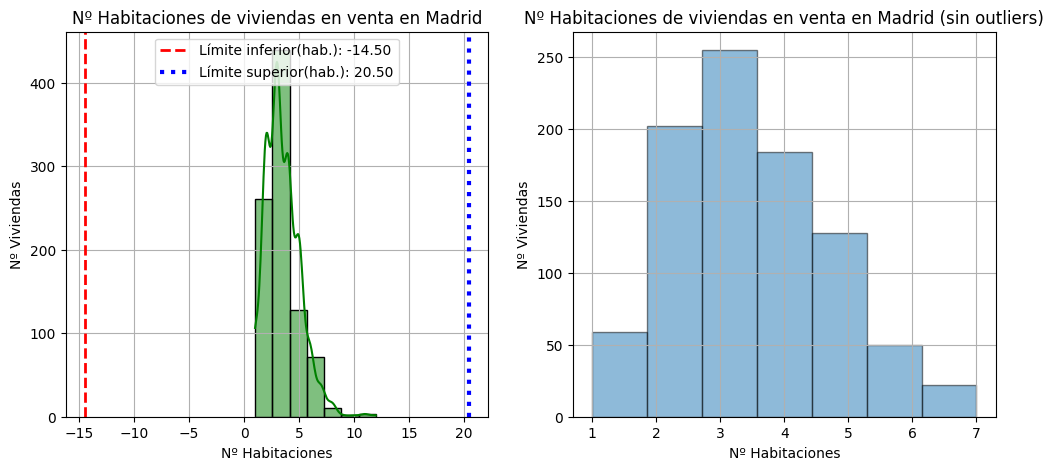

In [36]:
k = 1.5
habitaciones_sin_outliers_tukey = filtrar_outliers_tukey(num_habitaciones, k)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(num_habitaciones, bins=7, kde=True, color="green", edgecolor="black")
plt.title("Nº Habitaciones de viviendas en venta en Madrid")
plt.xlabel("Nº Habitaciones")
plt.ylabel("Nº Viviendas")
plt.axvline((q1_habitaciones - k * rango_habitaciones), color='red', linestyle='dashed', linewidth=2, label=f'Límite inferior(hab.): {(q1_habitaciones - k * rango_habitaciones):.2f}')
plt.axvline((q3_habitaciones + k * rango_habitaciones), color='blue', linestyle="dotted", linewidth=3, label=f'Límite superior(hab.): {(q3_habitaciones + k * rango_habitaciones):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(habitaciones_sin_outliers_tukey, bins=7, edgecolor='k', alpha=0.5)
plt.title("Nº Habitaciones de viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Nº Habitaciones")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

##### 3.1.2.4-FILTRADO TUKEY: SUPERFICIE.

Límite inferior: -136.0
Límite superior: 504.0


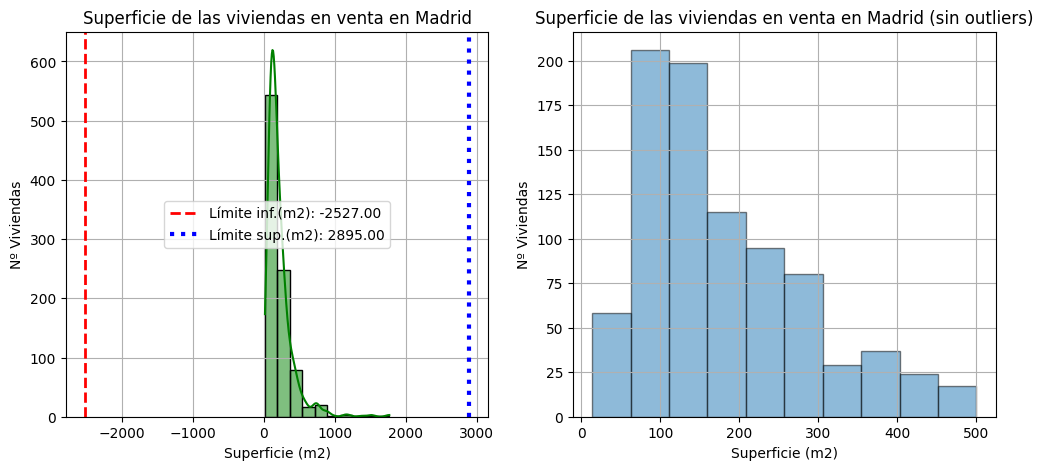

In [37]:
k = 1.5
superficie_sin_outliers_tukey = filtrar_outliers_tukey(superficie, k)

# Se van a representar 2 histogramas: 1º Datos originales con los límites superior e inferior; 2º Datos sin outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1er Histograma
sns.histplot(superficie, bins=10, kde=True, color="green", edgecolor="black")
plt.title("Superficie de las viviendas en venta en Madrid")
plt.xlabel("Superficie (m2)")
plt.ylabel("Nº Viviendas")
plt.axvline((q1_superficie - k * rango_superficie), color='red', linestyle='dashed', linewidth=2, label=f'Límite inf.(m2): {(q1_superficie - k * rango_superficie):.2f}')
plt.axvline((q3_superficie + k * rango_superficie), color='blue', linestyle="dotted", linewidth=3, label=f'Límite sup.(m2): {(q3_superficie + k * rango_superficie):.2f}')
plt.legend()
plt.grid()

plt.subplot(1,2,2) # 2º Histograma
plt.hist(superficie_sin_outliers_tukey, bins=10, edgecolor='k', alpha=0.5)
plt.title("Superficie de las viviendas en venta en Madrid (sin outliers)")
plt.xlabel("Superficie (m2)")
plt.ylabel("Nº Viviendas")
plt.grid()
plt.show()

### 3.2-ASIMETRÍAS

#### 3.2.1-ASIMETRÍAS: PRECIOS.

El coeficiente de asimetría de los Precios es: 2.299673447902698


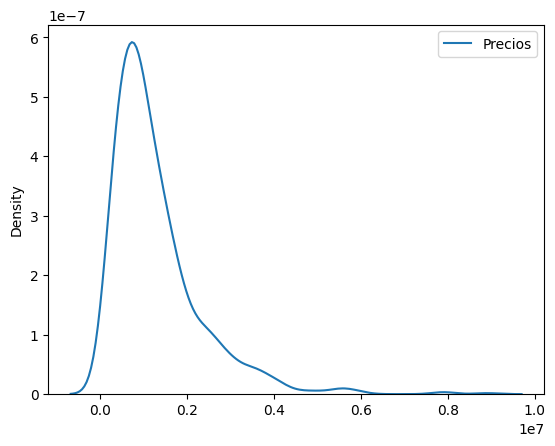

In [38]:
asimetria_precios = stats.skew(precios)    
print(f"El coeficiente de asimetría de los Precios es: {asimetria_precios}")

# Se dibuja la gráfica
sns.kdeplot(precios, label="Precios")
plt.legend()
plt.show();

<p> El coeficiente de asimetría es positivo y especialmente alto, lo cual es un fiel reflejo de lo que se puede observar en la gráfica: distribución asimétrica hacia la derecha con una cola hacia la derecha especialmente larga. Este hecho representa la existencia de valores atípicos de peso que hacen aumentar la media de la distribución, sin que por ello sea un valor especialmente representativo.

#### 3.2.2-ASIMETRÍAS: Nº BAÑOS.

El coeficiente de asimetría del Nº Baños es: 1.406223480498869


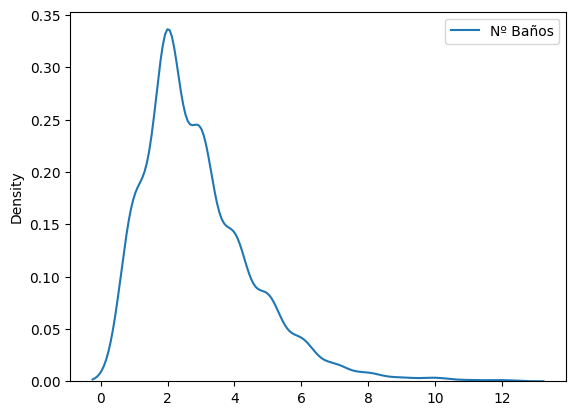

In [39]:
asimetria_num_banos = stats.skew(num_banos)    
print(f"El coeficiente de asimetría del Nº Baños es: {asimetria_num_banos}")

# Se dibuja la gráfica
sns.kdeplot(num_banos, label="Nº Baños")
plt.legend()
plt.show();

<p> En este caso, el valor del coeficiente de asimetría es positivo y de una escala moderada. La cola hacia la derecha no es tan prolongada como en el caso de la variable "precios". Aunque aún se observa una clara asimetría de la distribución. Apesar de la presencia de valores atípicos (constatados por la cola de la distribución) la mayor parte de las viviendas en venta cuenta con un número de baños bajo, 2-3 baños.

#### 3.2.3-ASIMETRÍAS: Nº HABITACIONES.

El coeficiente de asimetría del Nº Habitaciones es: 0.9666846137499158


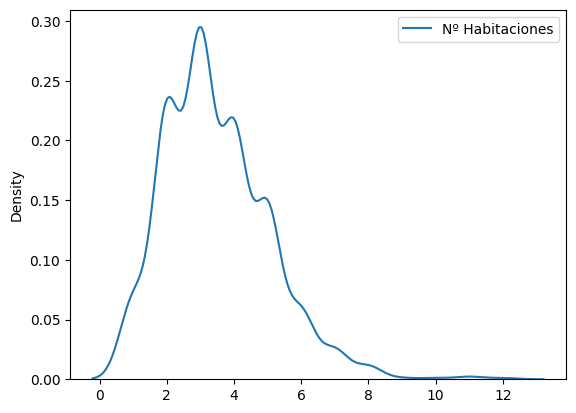

In [40]:
asimetria_num_habitaciones = stats.skew(num_habitaciones)    
print(f"El coeficiente de asimetría del Nº Habitaciones es: {asimetria_num_habitaciones}")

# Se dibuja la gráfica
sns.kdeplot(num_habitaciones, label="Nº Habitaciones")
plt.legend()
plt.show();

<p> Esta distribución presenta un coeficiente de asimetría positivo y relativamente bajo. Lo cual constata que la distribución presenta una asimetría hacia la derecha y una cola igualmente hacia la derecha, aunque no tan claras como en las 2 gráficas anteriores.

#### 3.2.4-ASIMETRÍAS: Nº SUPERFICIES.

El coeficiente de asimetría de la Superficie es: 3.358506945156488


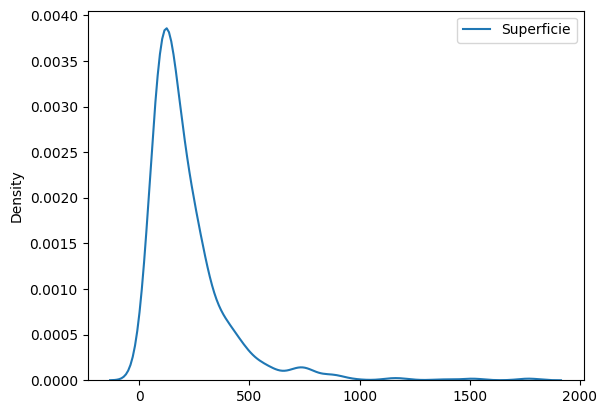

In [41]:
asimetria_superficie = stats.skew(superficie)    
print(f"El coeficiente de asimetría de la Superficie es: {asimetria_superficie}")

# Se dibuja la gráfica
sns.kdeplot(superficie, label="Superficie")
plt.legend()
plt.show();

<p> Esta distribución presenta un coeficiente de asimetría positivo y especialmente alto. Presenta una acusada asimetría hacia la derecha con una cola muy prolongada. Este hecho infiere la existencia de un reducido número de viviendas con unas superficies especialmente grandes, lo cual provoca que la media, prácticamente, carezca de valor representativo de la distribución. El pico acusado de la gráfica, indica la existencia de un gran número de viviendas cuyas superficies se concentran en un reducido rango de valores.

### 3.3-CURTOSIS.

#### 3.3.1-CURTOSIS: PRECIOS.

La curtosis de los Precios es: 8.547211919938682


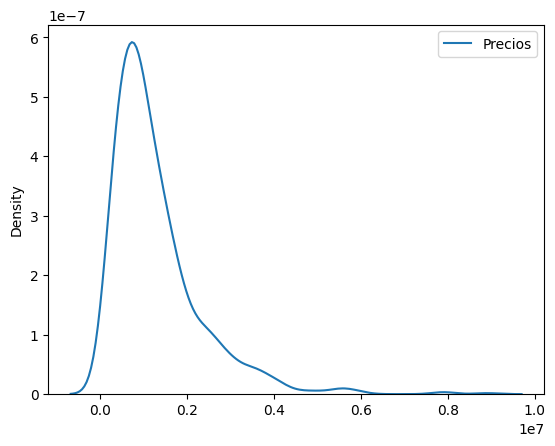

In [42]:
curtosis_precios = stats.kurtosis(precios)    
print(f"La curtosis de los Precios es: {curtosis_precios}")

# Se dibuja la gráfica
sns.kdeplot(precios, label="Precios")
plt.legend()
plt.show();

<p> En este caso, nos encontramos con una curtosis positiva (leptocúrtica) y de valor muy alto. Las características de este valor, se pueden observar en lo acusado que es el pico y lo extremadamente estrecha que es la distribución, además de lo larga que es la cola de la misma.

#### 3.3.2-CURTOSIS: Nº BAÑOS.

El coeficiente de asimetría del Nº Baños es: 3.038919834628685


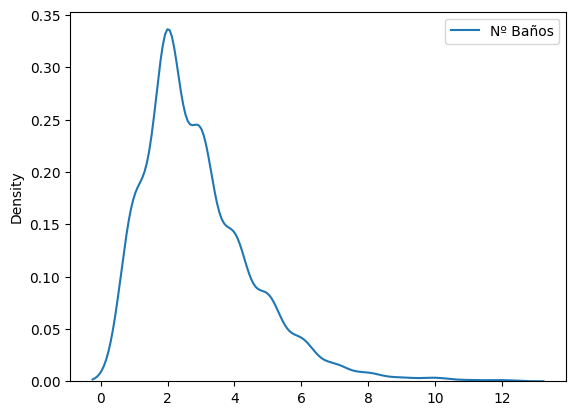

In [43]:
curtosis_num_banos = stats.kurtosis(num_banos)    
print(f"El coeficiente de asimetría del Nº Baños es: {curtosis_num_banos}")

# Se dibuja la gráfica
sns.kdeplot(num_banos, label="Nº Baños")
plt.legend()
plt.show();

<p> En este caso, nos encontramos con una curtosis positiva (leptocúrtica) y de valor alto. Las características de este valor, se pueden observar en lo acusado que es el pico y lo estrecha que es la distribución, además de lo larga que es la cola de la misma, aunque con una caída algo más progresiva que el caso de la variable "precios".

#### 3.3.3-CURTOSIS: Nº HABITACIONES.

El coeficiente de asimetría del Nº Habitaciones es: 1.9646434177831047


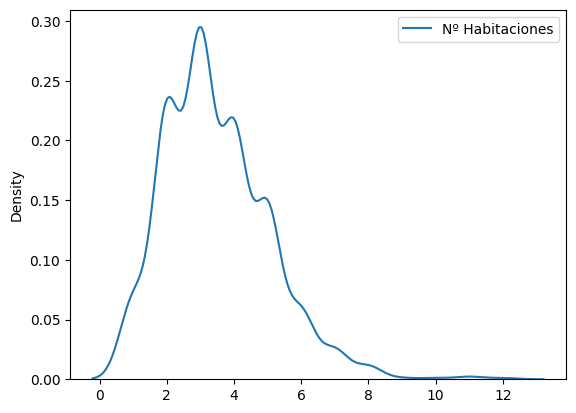

In [44]:
curtosis_num_habitaciones = stats.kurtosis(num_habitaciones)    
print(f"El coeficiente de asimetría del Nº Habitaciones es: {curtosis_num_habitaciones}")

# Se dibuja la gráfica
sns.kdeplot(num_habitaciones, label="Nº Habitaciones")
plt.legend()
plt.show();

<p> En este caso, nos encontramos con una curtosis positiva (leptocúrtica) y de valor moderado. Las características de este valor, se pueden observar en lo menos acusado acusado que es el pico y la mayor amplitud de la curva, además de una cola no tan alargada y con una caída algo más progresiva que el caso de la variable "precios".

#### 3.3.4-CURTOSIS: SUPERFICIE.

El coeficiente de asimetría de la Superficie es: 17.229111152834456


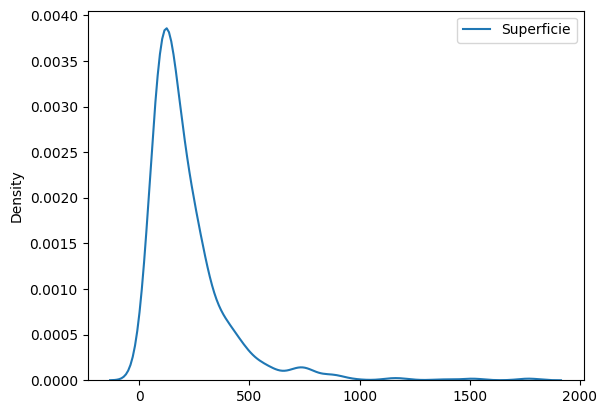

In [45]:
curtosis_superficie = stats.kurtosis(superficie)    
print(f"El coeficiente de asimetría de la Superficie es: {curtosis_superficie}")

# Se dibuja la gráfica
sns.kdeplot(superficie, label="Superficie")
plt.legend()
plt.show();

<p> El valor positivo y extremadamente alto de la curtosis de esta distribución, se ve reflejado en el acusado pico de la curva y en la extrema estrechez de la misma, así como la prolongada cola. Lo cual atestigua la presencia de los valores atípicos que se han mencionado anteriormente.

### 3.4-TRANSFORMACIÓN DE DISTRIBUCIONES DE DATOS.

<p>Dado que, por los apartados anteriores, se ha visto que las variables estudiadas tienen una acusada asimetría, en primer lugar se procede a realizar una transformación de las variables para corregir esta asimetría.
<p>Posteriormente, se realizará una estandarización para poner los datos en una escala comparable.
<p>De esta manera, no se requiere prescindir de datos (ouliers) de las variables, compactando y mitigando su impacto en el estudio.
<p>A continuación, se van a realizar las transformaciones de las variables mediante las funciones Raíz y Logaritmo. Para la estandarización, nos basaremos en la transformación logarítmica.
<p> En las gráficas se puede observar cómo, partiendo de una distribución (en azul) asimétrica y con una prolongada cola, se puede reducir el efecto de la asimetría y minimizar (sin prescindir de ellos) el efecto de los valores atípicos. 
<br>En las gráficas centrales (en rojo), se ha aplicado la transformación mediante la función Raíz. Aunque se ha corregido sensiblemente la asimetría de la gráfica original, aún se pueden observar cierta asimetría y la presencia de una cola hacia la derecha, aunque sensiblemente menos prolongada que la original.
<br>En las gráficas de la derecha (en verde), se ha realizado la transformación de la distribución original aplicando la función logaritmo. En este caso, aun observando una ligera asimetría, su distribución sí es más similar a una distribución normal.

<p>NOTA: En la fuente de datos (archivo externo csv), se han encontrado 8 casos con valores nulos en la variable "Nº Habitaciones. Estos valores nulos han sido sustituidos por valores medios, en función de la superficie de las viviendas. De no haber realizado esta operación, y por no eliminar información, la función logarítmica habría dado errores.

#### 3.4.1-TRANSFORMACIÓN: PRECIOS.

La media de la variable Precios, tansformada con la Función Raíz es: 1062.995530810247
La mediana de la variable Precios, tansformada con la Función Raíz es: 994.98743710662
La desviación estándar de la variable Precios, tansformada con la Función Raíz es: 400.7689655805745

La media de la variable Precios, tansformada con la Función Logaritmo es: 13.799634747416832
La mediana de la variable Precios, tansformada con la Función Logaritmo es: 13.805460222110773
La desviación estándar de la variable Precios, tansformada con la Función Logaritmo es: 0.7493057035321888


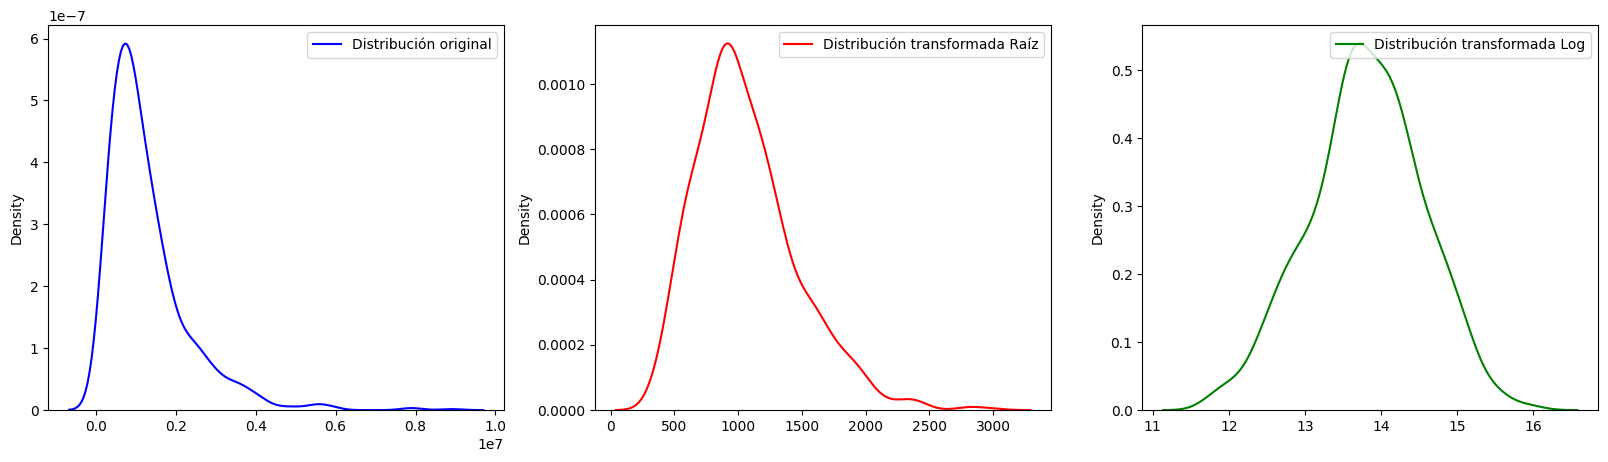

In [46]:
# Transformación mediante Función Raíz.
precios_sqrt = np.sqrt(precios)
# Calculamos las métricas.
media_precios_sqrt = np.mean(precios_sqrt)
mediana_precios_sqrt = np.median(precios_sqrt)
desv_precios_sqrt = np.std(precios_sqrt)
print(f"La media de la variable Precios, tansformada con la Función Raíz es: {media_precios_sqrt}")
print(f"La mediana de la variable Precios, tansformada con la Función Raíz es: {mediana_precios_sqrt}")
print(f"La desviación estándar de la variable Precios, tansformada con la Función Raíz es: {desv_precios_sqrt}\n")

#Transformación mediante Función Logaritmo.
precios_log = np.log(precios)
# Calculamos las métricas.
media_precios_log = np.mean(precios_log)
mediana_precios_log = np.median(precios_log)
desv_precios_log = np.std(precios_log)
print(f"La media de la variable Precios, tansformada con la Función Logaritmo es: {media_precios_log}")
print(f"La mediana de la variable Precios, tansformada con la Función Logaritmo es: {mediana_precios_log}")
print(f"La desviación estándar de la variable Precios, tansformada con la Función Logaritmo es: {desv_precios_log}")

# Se comparan las gráficas de las transformaciones anteriores con la original.
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(precios, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(precios_sqrt, color="red", label="Distribución transformada Raíz")
plt.legend()
plt.subplot(1,3,3)
sns.kdeplot(precios_log, color="green", label="Distribución transformada Log")
plt.legend(loc=1)
plt.show();

#### 3.4.2-TRANSFORMACIÓN: Nº BAÑOS.

La media de la variable Nº Baños, tansformada con la Función Raíz es: 1.6424182653427124
La mediana de la variable Nº Baños, tansformada con la Función Raíz es: 1.7320507764816284
La desviación estándar de la variable Nº Baños, tansformada con la Función Raíz es: 0.45056435465812683

La media de la variable Nº Baños, tansformada con la Función Raíz es: 0.9175607562065125
La mediana de la variable Nº Baños, tansformada con la Función Raíz es: 1.0986123085021973
La desviación estándar de la variable Nº Baños, tansformada con la Función Raíz es: 0.5498002171516418


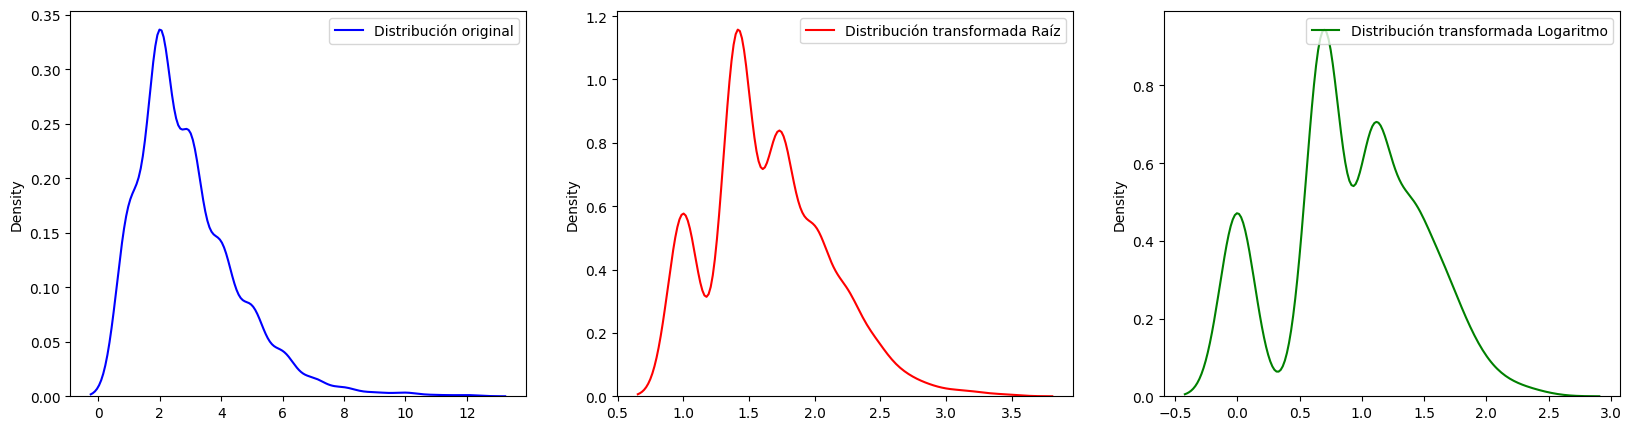

In [88]:
# Transformación mediante Función Raíz.
num_banos_sqrt = np.sqrt(num_banos)
# Calculamos las métricas.
media_num_banos_sqrt = np.mean(num_banos_sqrt)
mediana_num_banos_sqrt = np.median(num_banos_sqrt)
desv_num_banos_sqrt = np.std(num_banos_sqrt)
print(f"La media de la variable Nº Baños, tansformada con la Función Raíz es: {media_num_banos_sqrt}")
print(f"La mediana de la variable Nº Baños, tansformada con la Función Raíz es: {mediana_num_banos_sqrt}")
print(f"La desviación estándar de la variable Nº Baños, tansformada con la Función Raíz es: {desv_num_banos_sqrt}\n")

#Transformación mediante Función Logaritmo.
num_banos_log = np.log(num_banos)
# Calculamos las métricas.
media_num_banos_log = np.mean(num_banos_log)
mediana_num_banos_log = np.median(num_banos_log)
desv_num_banos_log = np.std(num_banos_log)
print(f"La media de la variable Nº Baños, tansformada con la Función Raíz es: {media_num_banos_log}")
print(f"La mediana de la variable Nº Baños, tansformada con la Función Raíz es: {mediana_num_banos_log}")
print(f"La desviación estándar de la variable Nº Baños, tansformada con la Función Raíz es: {desv_num_banos_log}")

# Se comparan las gráficas de las transformaciones anteriores con la original.
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(num_banos, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(num_banos_sqrt, color="red", label="Distribución transformada Raíz")
plt.legend()
plt.subplot(1,3,3)
sns.kdeplot(num_banos_log, color="green", label="Distribución transformada Logaritmo")
plt.legend()
plt.show();

#### 3.4.3-TRANSFORMACIÓN: Nº HABITACIONES.

La media de la variable Nº Habitaciones, tansformada con la Función Raíz es: 1.820530652999878
La mediana de la variable Nº Habitaciones, tansformada con la Función Raíz es: 1.7320507764816284
La desviación estándar de la variable Nº Habitaciones, tansformada con la Función Raíz es: 0.4160518944263458

La media de la variable Nº Habitaciones, tansformada con la Función Raíz es: 1.1434109210968018
La mediana de la variable Nº Habitaciones, tansformada con la Función Raíz es: 1.0986123085021973
La desviación estándar de la variable Nº Habitaciones, tansformada con la Función Raíz es: 0.477474182844162


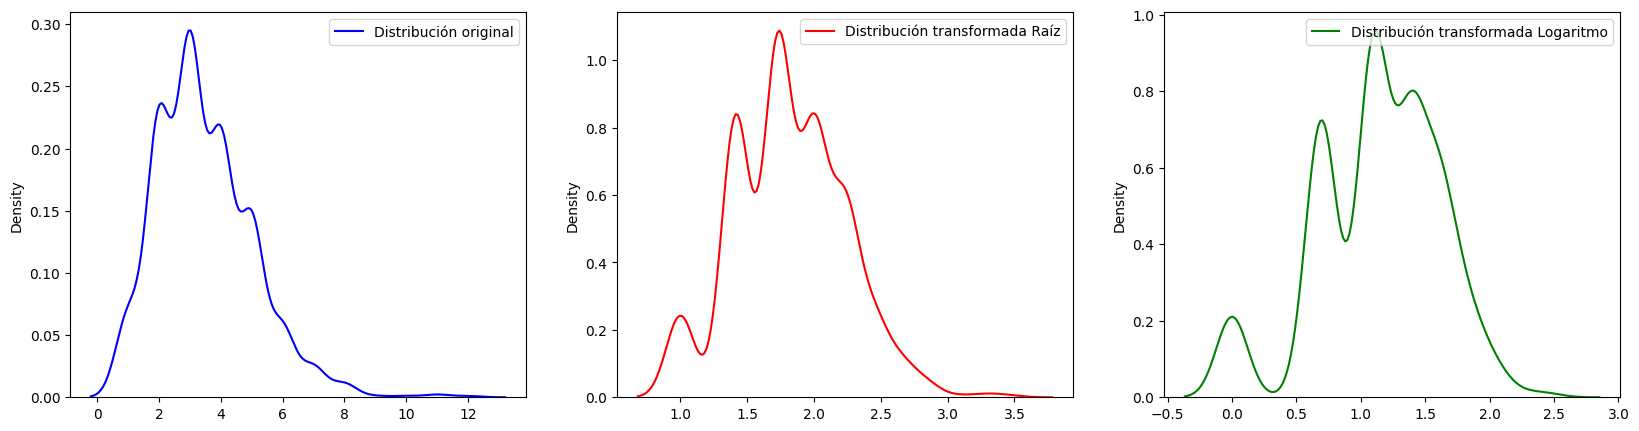

In [89]:
# Transformación mediante Función Raíz.
num_habitaciones_sqrt = np.sqrt(num_habitaciones)
# Calculamos las métricas.
media_num_habitaciones_sqrt = np.mean(num_habitaciones_sqrt)
mediana_num_habitaciones_sqrt = np.median(num_habitaciones_sqrt)
desv_num_habitaciones_sqrt = np.std(num_habitaciones_sqrt)
print(f"La media de la variable Nº Habitaciones, tansformada con la Función Raíz es: {media_num_habitaciones_sqrt}")
print(f"La mediana de la variable Nº Habitaciones, tansformada con la Función Raíz es: {mediana_num_habitaciones_sqrt}")
print(f"La desviación estándar de la variable Nº Habitaciones, tansformada con la Función Raíz es: {desv_num_habitaciones_sqrt}\n")

#Transformación mediante Función Logaritmo.
num_habitaciones_log = np.log(num_habitaciones)

# Calculamos las métricas.
media_num_habitaciones_log = np.mean(num_habitaciones_log)
mediana_num_habitaciones_log = np.median(num_habitaciones_log)
desv_num_habitaciones_log = np.std(num_habitaciones_log)
print(f"La media de la variable Nº Habitaciones, tansformada con la Función Raíz es: {media_num_habitaciones_log}")
print(f"La mediana de la variable Nº Habitaciones, tansformada con la Función Raíz es: {mediana_num_habitaciones_log}")
print(f"La desviación estándar de la variable Nº Habitaciones, tansformada con la Función Raíz es: {desv_num_habitaciones_log}")

# Se comparan las gráficas de las transformaciones anteriores con la original.
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(num_habitaciones, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,3,2)
sns.kdeplot(num_habitaciones_sqrt, color="red", label="Distribución transformada Raíz")
plt.legend()
plt.subplot(1,3,3)
sns.kdeplot(num_habitaciones_log, color="green", label="Distribución transformada Logaritmo")
plt.legend()
plt.show();

#### 3.4.4-TRANSFORMACIÓN: SUPERFICIE.

La media de la variable Precios, tansformada con la Función Raíz es: 13.798583984375
La mediana de la variable Precios, tansformada con la Función Raíz es: 12.569805145263672
La desviación estándar de la variable Precios, tansformada con la Función Raíz es: 5.180476665496826

La media de la variable Precios, tansformada con la Función Raíz es: 5.127078056335449
La mediana de la variable Precios, tansformada con la Función Raíz es: 5.062594890594482
La desviación estándar de la variable Precios, tansformada con la Función Raíz es: 0.6852499842643738


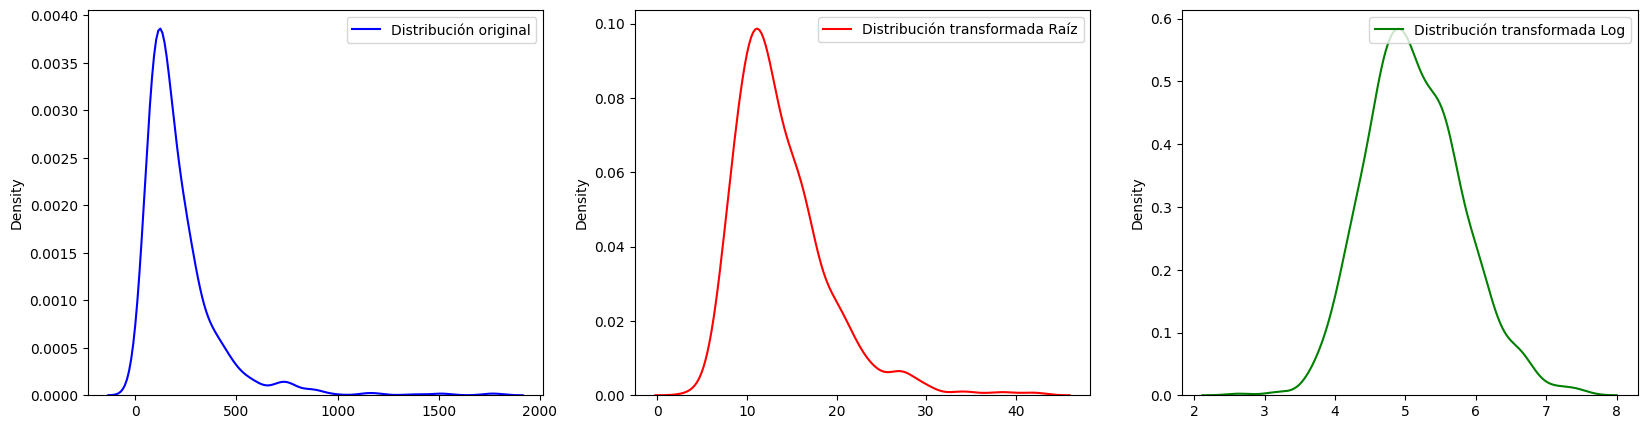

In [49]:
# Transformación mediante Función Raíz.
superficie_sqrt = np.sqrt(superficie)
# Calculamos las métricas.
media_superficie_sqrt = np.mean(superficie_sqrt)
mediana_superficie_sqrt = np.median(superficie_sqrt)
desv_superficie_sqrt = np.std(superficie_sqrt)
print(f"La media de la variable Precios, tansformada con la Función Raíz es: {media_superficie_sqrt}")
print(f"La mediana de la variable Precios, tansformada con la Función Raíz es: {mediana_superficie_sqrt}")
print(f"La desviación estándar de la variable Precios, tansformada con la Función Raíz es: {desv_superficie_sqrt}\n")

#Transformación mediante Función Logaritmo.
superficie_log = np.log(superficie)
# Calculamos las métricas.
media_superficie_log = np.mean(superficie_log)
mediana_superficie_log = np.median(superficie_log)
desv_superficie_log = np.std(superficie_log)
print(f"La media de la variable Precios, tansformada con la Función Raíz es: {media_superficie_log}")
print(f"La mediana de la variable Precios, tansformada con la Función Raíz es: {mediana_superficie_log}")
print(f"La desviación estándar de la variable Precios, tansformada con la Función Raíz es: {desv_superficie_log}")

# Se comparan las gráficas de las transformaciones anteriores con la original.
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.kdeplot(superficie, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1, 3, 2)
sns.kdeplot(superficie_sqrt, color="red", label="Distribución transformada Raíz")
plt.legend()
plt.subplot(1, 3, 3)
sns.kdeplot(superficie_log, color="green",label="Distribución transformada Log")
plt.legend(loc=1)
plt.show();

### 3.5-ESTANDARIZACIÓN.

Las gráficas de la izaquierda (en azul), representan la curva de densidad de las variables originales. Las curvas de la derecha (en verde), representan la curva de densidad de las variables estandarizadas, previamente transformadas. Como se puede observar, se atenúan las asimetrías de las distribuciones originales y se minimizan las colas.

#### 3.5.1-ESTANDARIZACIÓN: PRECIOS.

La media estandarizada de precios es: -3.9409883977950913e-16
La mediana estandarizada de precios es: 0.007774496666020024
La desviación estándar estandarizada de precios es: 1.0


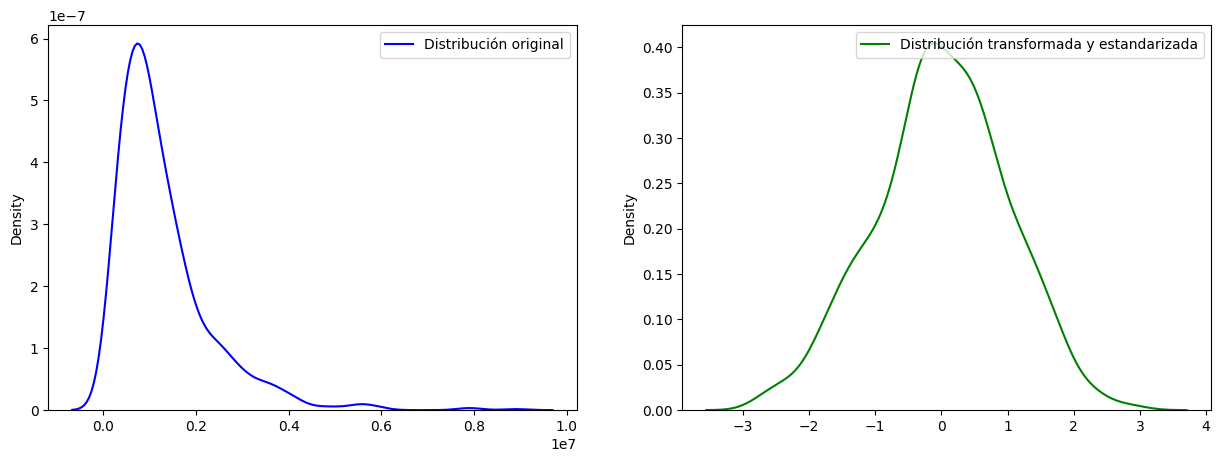

In [83]:
# Se estandarizan los precios
precios_standard = (precios_log - media_precios_log) / desv_precios_log

# Se calculan las nuevas métricas a partir de los datos estandarizados.
media_precios_standard = np.mean(precios_standard)
mediana_precios_standard = np.median(precios_standard)
desv_precios_standard = np.std(precios_standard)

print(f"La media estandarizada de precios es: {media_precios_standard}")
print(f"La mediana estandarizada de precios es: {mediana_precios_standard}")
print(f"La desviación estándar estandarizada de precios es: {desv_precios_standard}")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(precios, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(precios_standard, color="green", label="Distribución transformada y estandarizada")
plt.legend(loc=1)
plt.show();



#### 3.5.2-ESTANDARIZACIÓN: Nº BAÑOS.

La media estandarizada del número de baños es: 2.7098941757230932e-08
La mediana estandarizada del número de baños es: 0.3293042480945587
La desviación estándar del número de baños es: 0.9999998807907104


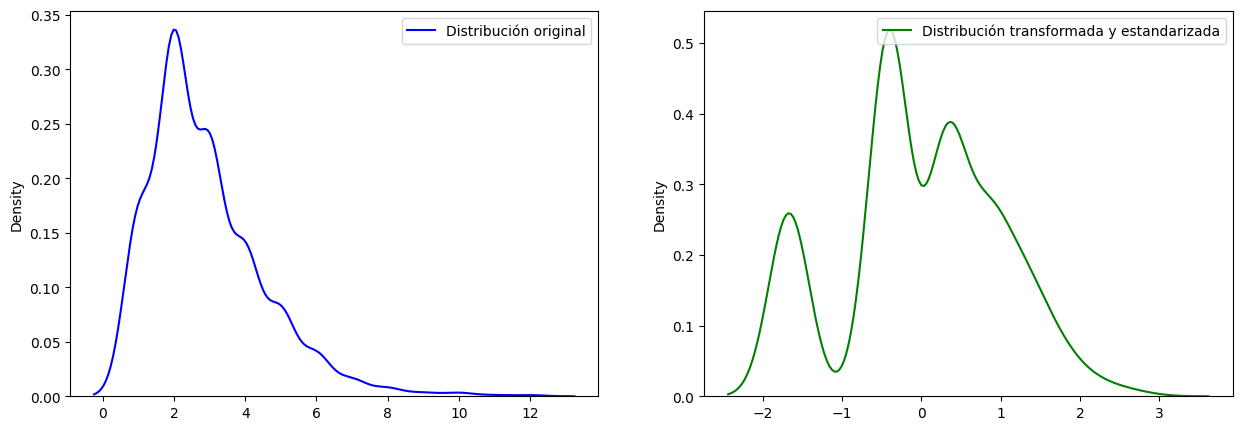

In [84]:
# Se estandariza el número de baños
num_banos_standard = (num_banos_log - media_num_banos_log) / desv_num_banos_log

# Se calculan las nuevas métricas a partir de los datos estandarizados.
media_banos_standard = np.mean(num_banos_standard)
mediana_banos_standard = np.median(num_banos_standard)
desv_banos_standard = np.std(num_banos_standard)

print(f"La media estandarizada del número de baños es: {media_banos_standard}")
print(f"La mediana estandarizada del número de baños es: {mediana_banos_standard}")
print(f"La desviación estándar del número de baños es: {desv_banos_standard}")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(num_banos, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(num_banos_standard, color="green", label="Distribución transformada y estandarizada")
plt.legend(loc=1)
plt.show();

#### 3.5.3-ESTANDARIZACIÓN: Nº HABITACIONES.

La media estandarizada del número de habitaciones es: 3.5437079048961095e-08
La mediana estandarizada del número de habitaciones es: -0.09382415562868118
La desviación estándar del número de habitaciones es: 0.9999999403953552


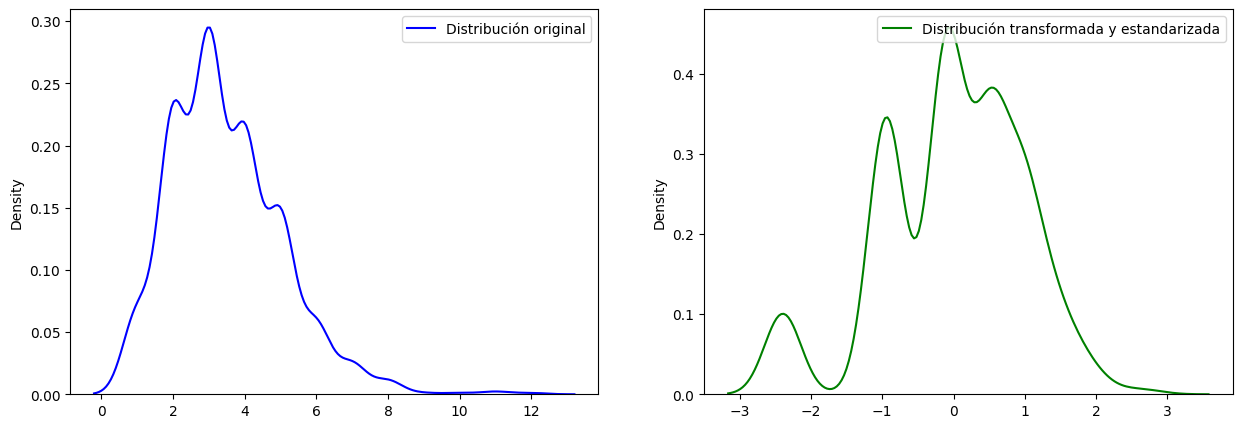

In [85]:
# Se estandariza el número de habitaciones
num_habitaciones_standard = (num_habitaciones_log - media_num_habitaciones_log) / desv_num_habitaciones_log

# Se calculan las nuevas métricas a partir de los datos estandarizados.
media_habitaciones_standard = np.mean(num_habitaciones_standard)
mediana_habitaciones_standard = np.median(num_habitaciones_standard)
desv_habitaciones_standard = np.std(num_habitaciones_standard)

print(f"La media estandarizada del número de habitaciones es: {media_habitaciones_standard}")
print(f"La mediana estandarizada del número de habitaciones es: {mediana_habitaciones_standard}")
print(f"La desviación estándar del número de habitaciones es: {desv_habitaciones_standard}")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(num_habitaciones, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(num_habitaciones_standard, color="green", label="Distribución transformada y estandarizada")
plt.legend(loc=1)
plt.show();

#### 3.5.4-ESTANDARIZACIÓN: SUPERFICIE.

La media estandarizada de la superficie es: -2.209606009273557e-07
La mediana estandarizada de la superficie es: -0.0941016674041748
La desviación estándar estandarizada de la superficie es: 0.9999999403953552


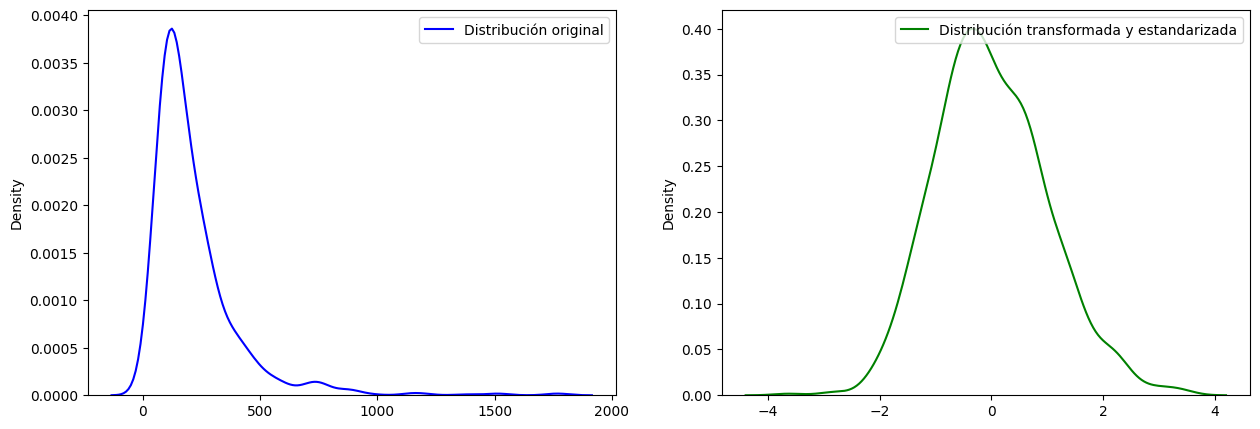

In [86]:
# Se estandarizan las superficies
superficie_standard = (superficie_log - media_superficie_log) / desv_superficie_log

# Se calculan las nuevas métricas a partir de los datos estandarizados.
media_superficie_standard = np.mean(superficie_standard)
mediana_superficie_standard = np.median(superficie_standard)
desv_superficie_standard = np.std(superficie_standard)

print(f"La media estandarizada de la superficie es: {media_superficie_standard}")
print(f"La mediana estandarizada de la superficie es: {mediana_superficie_standard}")
print(f"La desviación estándar estandarizada de la superficie es: {desv_superficie_standard}")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(superficie, color="blue", label="Distribución original")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(superficie_standard, color="green", label="Distribución transformada y estandarizada")
plt.legend(loc=1)
plt.show();

#### 3.5.5-HISTOGRAMAS ESTANDARIADOS.

Se presentan gráficas comparando la variable "precio" con el resto de variables. En las gráficas de la izquierda se representan la comparativa de las distribuciones originales de las variables. En las gráficas de la derecha, se representan la comparativa de las distribuciones de las variables estandarizadas, y previamente transformadas.

En dichas comparativas estandarizadas, se puede observar la estrecha relación lineal entre el precio con las demás variables.

##### 3.5.5.1-HISTOGRAMAS ESTANDARIZADOS: PRECIO vs. Nº BAÑOS

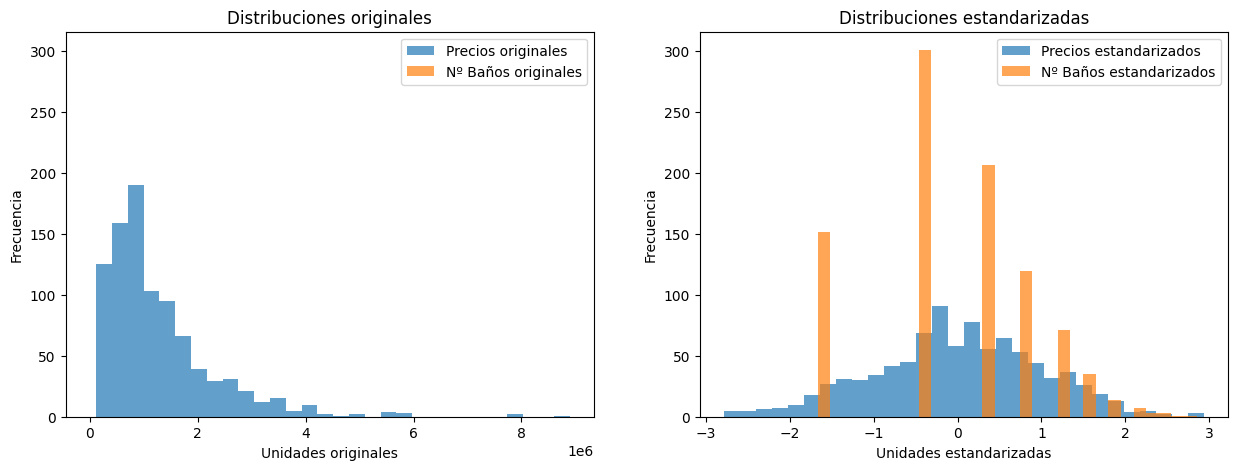

In [54]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # Se dibujan las distribuciones originales
plt.hist(precios, bins=30, alpha=0.7, label="Precios originales")
plt.hist(num_banos, bins=30, alpha=0.7, label="Nº Baños originales")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1,2,2) # Se dibujan las distribuciones estandarizadas
plt.hist(precios_standard, bins=30, alpha=0.7, label="Precios estandarizados")
plt.hist(num_banos_standard, bins=30, alpha=0.7, label="Nº Baños estandarizados")
plt.title("Distribuciones estandarizadas")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

##### 3.5.5.2-HISTOGRAMAS ESTANDARIZADOS: PRECIO vs. Nº HABITACIONES

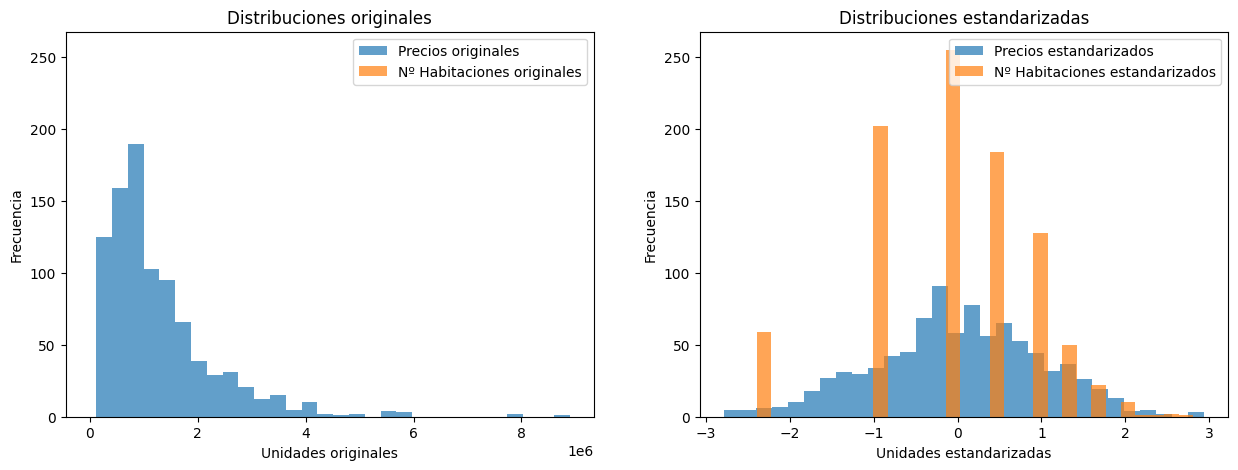

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # Se dibujan las distribuciones originales
plt.hist(precios, bins=30, alpha=0.7, label="Precios originales")
plt.hist(num_habitaciones, bins=30, alpha=0.7, label="Nº Habitaciones originales")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1,2,2) # Se dibujan las distribuciones estandarizadas
plt.hist(precios_standard, bins=30, alpha=0.7, label="Precios estandarizados")
plt.hist(num_habitaciones_standard, bins=30, alpha=0.7, label="Nº Habitaciones estandarizados")
plt.title("Distribuciones estandarizadas")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

##### 3.5.5.3-HISTOGRAMAS ESTANDARIZADOS: PRECIO vs. SUPERFICIE

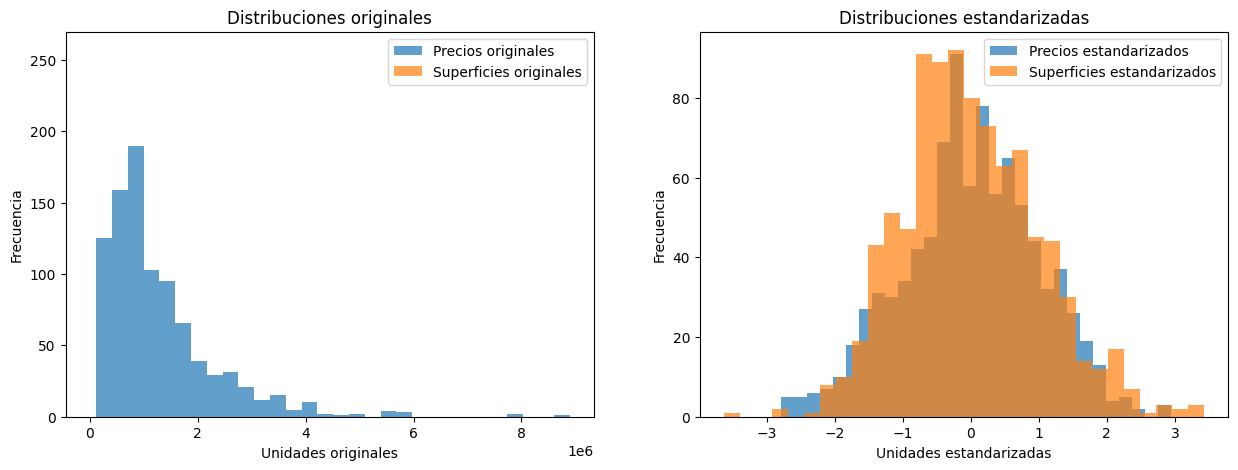

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1) # Se dibujan las distribuciones originales
plt.hist(precios, bins=30, alpha=0.7, label="Precios originales")
plt.hist(superficie, bins=30, alpha=0.7, label="Superficies originales")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1,2,2) # Se dibujan las distribuciones estandarizadas
plt.hist(precios_standard, bins=30, alpha=0.7, label="Precios estandarizados")
plt.hist(superficie_standard, bins=30, alpha=0.7, label="Superficies estandarizados")
plt.title("Distribuciones estandarizadas")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

### 3.6-CORRELACIÓN

Para el estudio de la correlación, se utiliza el Coeficiente de Correlación Lineal de Pearson.
La fórmula aplicable es:
$$
\Large Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n}\\
\Large \rho = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}
$$

Y el criterio que se utiliza para evaluar la correlación es:
- 0: asociación nula.
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.



#### 3.6.1-CORRELACIÓN PRECIOS vs. RESTO VARIABLES

In [57]:
print(f"Correlación Precios vs. Nº Baños: {stats.pearsonr(precios_standard, num_banos_standard)[0]}")
print(f"Correlación Precios vs. Nº Habitaciones: {stats.pearsonr(precios_standard, num_habitaciones_standard)[0]}")
print(f"Correlación Precios vs. Nº Superficie: {stats.pearsonr(precios_standard, superficie_standard)[0]}")

Correlación Precios vs. Nº Baños: 0.7972880747311566
Correlación Precios vs. Nº Habitaciones: 0.6538380075075447
Correlación Precios vs. Nº Superficie: 0.8217526058708332


#### 3.6.2-CORRELACIÓN Nº BAÑOS vs. RESTO VARIABLES

In [58]:
print(f"Correlación Nº Baños vs. Precios: {stats.pearsonr(num_banos_standard, precios_standard)[0]}")
print(f"Correlación Nº Baños vs. Nº Habitaciones: {stats.pearsonr(num_banos_standard, num_habitaciones_standard)[0]}")
print(f"Correlación Nº Baños vs. Nº Superficie: {stats.pearsonr(num_banos_standard, superficie_standard)[0]}")

Correlación Nº Baños vs. Precios: 0.7972880747311566
Correlación Nº Baños vs. Nº Habitaciones: 0.7685355249741406
Correlación Nº Baños vs. Nº Superficie: 0.8583060586819329


#### 3.6.3-CORRELACIÓN Nº HABITACIONES vs. RESTO VARIABLES

In [59]:
print(f"Correlación Nº Habitaciones vs. Precios: {stats.pearsonr(num_habitaciones_standard, precios_standard)[0]}")
print(f"Correlación Nº Habitaciones vs. Nº Baños: {stats.pearsonr(num_habitaciones_standard, num_banos_standard)[0]}")
print(f"Correlación Nº Habitaciones vs. Nº Superficie: {stats.pearsonr(num_habitaciones_standard, superficie_standard)[0]}")

Correlación Nº Habitaciones vs. Precios: 0.6538380075075446
Correlación Nº Habitaciones vs. Nº Baños: 0.7685355364155839
Correlación Nº Habitaciones vs. Nº Superficie: 0.8083837101180507


#### 3.6.4-CORRELACIÓN SUPERFICIE vs. RESTO VARIABLES

In [60]:
print(f"Correlación Superficie vs. Precios: {stats.pearsonr(superficie_standard, precios_standard)[0]}")
print(f"Correlación Superficie vs. Nº Baños: {stats.pearsonr(superficie_standard, num_banos_standard)[0]}")
print(f"Correlación Superficie vs. Nº Habitaciones: {stats.pearsonr(superficie_standard, num_habitaciones_standard)[0]}")


Correlación Superficie vs. Precios: 0.8217526058708332
Correlación Superficie vs. Nº Baños: 0.858306063604914
Correlación Superficie vs. Nº Habitaciones: 0.8083837043176629


#### 3.6.5-CORRELACIÓN ENTRE VARIABLES

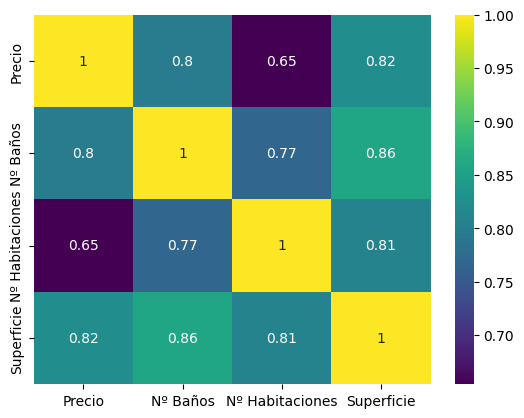

In [61]:
# Se crea la matriz de las correlaciones entre variables
columnas = [precios_standard, num_banos_standard, num_habitaciones_standard, superficie_standard]

matriz_lista = list()

for columna_1 in columnas:
    fila = list()
    for columna_2 in columnas:
        fila.append(stats.pearsonr(columna_1, columna_2)[0])
    matriz_lista.append(fila)

matriz = np.array(matriz_lista)

# Se representa la matriz de las correlaciones entre variables
nombres_columnas = ["Precio", "Nº Baños", "Nº Habitaciones", "Superficie"]
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=nombres_columnas, yticklabels=nombres_columnas)
plt.show();


### 3.7-CONTRASTE DE HIPÓTESIS.

#### 3.7.1-CASO Nº 1: PRECIOS DE VIVIENDAS EN FUNCIÓN DEL Nº DE BAÑOS.

Se van a contrastar las siguientes hipótesis:
- $H_0$: Las viviendas de 1-2 baños son más caras que las de >= 3 baños.
- $H_1$: Las viviendas de >= 3 baños son más caras que las de 1-2 baños.

##### 3.7.1.1-OBTENCIÓN DE MUESTRAS.

In [62]:
# Se van a obtener 2 arrays: 1º Array con los precios de las viviendas de < 3 habitaciones; 2º Array con los precios de las viviendas de >= 3 habitaciones.

# 1º Array de precios de viviendas de < 3 habitaciones.
# De la variable de Nº Habitaciones, obtenemos los índices de aquellos elementos que tengan menos de 3 habitaciones.
index_viviendas_hasta_3 = np.where(num_habitaciones < 3)
# Utilizando los índices obtenidos en el paso anterior, vamos a extraer, de la variable "precios", los precios que se corresponden con las viviendas de < 3 habitaciones.
precios_menos_3_habitaciones = precios[index_viviendas_hasta_3]
print(f"Hay {precios_menos_3_habitaciones.shape[0]} viviendas en venta con menos de 3 habitaciones.")

# 2º Array de precios de viviendas de >= 3 habitaciones.
# De la variable de Nº Habitaciones, obtenemos los índices de aquellos elementos que tengan 3 o más habitaciones.
index_viviendas_mas_de_3 = np.where(num_habitaciones >= 3)
# Utilizando los índices obtenidos en el paso anterior, vamos a extraer, de la variable "precios", los precios que se corresponden con las viviendas de < 3 habitaciones.
precios_mas_3_habitaciones = precios[index_viviendas_mas_de_3]
print(f"Hay {precios_mas_3_habitaciones.shape[0]} viviendas en venta con 3 o más habitaciones.")

Hay 261 viviendas en venta con menos de 3 habitaciones.
Hay 654 viviendas en venta con 3 o más habitaciones.


##### 3.7.1.2-DISTRIBUCIÓN DE LAS MUESTRAS.

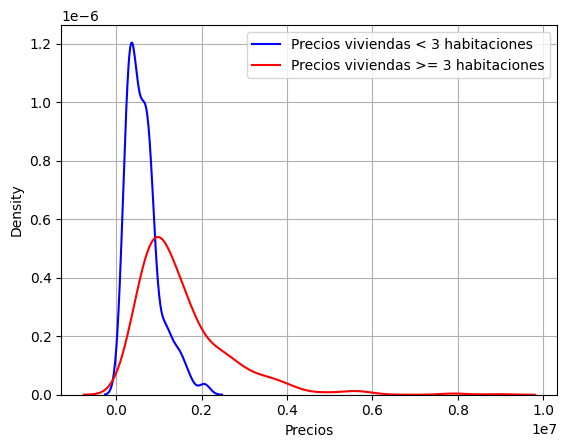

In [63]:
sns.kdeplot(precios_menos_3_habitaciones, color="blue", label="Precios viviendas < 3 habitaciones")
sns.kdeplot(precios_mas_3_habitaciones, color="red", label="Precios viviendas >= 3 habitaciones")
plt.grid()
plt.xlabel("Precios")
plt.legend()
plt.show()

##### 3.7.1.3-NIVEL DE SIGNIFICANCIA.

| | Contraste $H_0$ | Contraste $H_1$ |
|-|--|--|
| Real $H_0$ | OK | Tipo I |
| Real $H_1$ | Tipo II | OK |

- $α = 0.05$

In [64]:
alpha = 0.05

##### 3.7.1.4-NORMALIDAD DE LAS MUESTRAS.

In [65]:
# Se realiza la prueba de la normalidad de la distribución de las muestras.
_, p_mas_3 = stats.normaltest(precios_mas_3_habitaciones)
_, p_menos_3 =stats.normaltest(precios_menos_3_habitaciones)
print("Resultado de las pruebas de Normalidad de las Distribuciones de las muestras:")
print(f"Viviendas de menos de 3 habitaciones: {p_menos_3}.")
print(f"Viviendas de 3 o más habitaciones: {p_mas_3}.")


Resultado de las pruebas de Normalidad de las Distribuciones de las muestras:
Viviendas de menos de 3 habitaciones: 5.061958573612673e-14.
Viviendas de 3 o más habitaciones: 3.3579915784285526e-70.


##### 3.7.1.5-HOMOGENEIDAD DE LAS VARIANZAS DE LAS MUESTRAS.

In [66]:
# Se realiza la prueba de Homogeneidad de la varianzas.
_, p_var = stats.levene(precios_menos_3_habitaciones, precios_mas_3_habitaciones)
print(f"El resultado de la prueba de Homogeneidad de la Varianza es: {p_var}")

El resultado de la prueba de Homogeneidad de la Varianza es: 1.597026903228665e-16


##### 3.7.1.6-COMPROBACIÓN DE RESULTADOS.

In [67]:
# Se comprueban los valores p obtenidos.
resultado = p_mas_3 > alpha and p_menos_3 > alpha and p_var > alpha
if resultado:
    print("Se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.")
else:
    print("NO se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.")

NO se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.


Dado que las muestras objeto de estudio para el contraste de las hipótesis no tienen una distribución normal, sus varianzas no son homogéneas y hay presencia de outliers, se va a proceder a realizar pruebas de tipo "no paramétricas".

##### 3.7.1.7-PRUEBA DE MANN-WHITNEY U

In [68]:
# Prueba de Mann-Whitney U
u_stat, p_valor = mannwhitneyu(precios_menos_3_habitaciones, precios_mas_3_habitaciones)

print(f"El resultado de Estadístico U es: {u_stat}.")
print(f"El resultado del Valor p es: {p_valor}.")

if p_valor < alpha:
    print("Se rechaza la hipótesis nula H0. Existe suficiente evidencia para dar por válida la hipótesis H1")
else:
    print("No se puede rechazar la hipótesis nula H0.")


El resultado de Estadístico U es: 28299.5.
El resultado del Valor p es: 2.90701510502929e-56.
Se rechaza la hipótesis nula H0. Existe suficiente evidencia para dar por válida la hipótesis H1


#### 3.7.2-CASO Nº 2: PRECIO DE LAS VIVIENDAS EN FUNCIÓN DEL BARRIO. 

Se van a contrastar las siguientes hipótesis:
- $H_0$: Las viviendas del Barrio de Salamanca son más baratas que las del barrio de Chamartín.
- $H_1$: Las viviendas del barrio de Chamartín son más baratas que las del Barrio de Salamanca.

##### 3.7.2.1-OBTENCIÓN DE MUESTRAS.

In [69]:
# Se van a obtener 2 arrays: 1º Array con los precios de las viviendas del barrio de Chamartín; 2º Array con los precios de las viviendas del Barrio de Salamanca.

# 1º Array de precios de viviendas del barrio de Chamartín.
# De la variable de "barrios", obtenemos los índices de aquellos elementos cuyo valor sea "Chamartín".
index_precios_chamartin = np.where(barrios == "Chamartín")
# Utilizando los índices obtenidos en el paso anterior, vamos a extraer, de la variable "precios", los precios que se corresponden con las viviendas del barrio de Chamartín.
precios_chamartin = precios[index_precios_chamartin]
print(f"Hay {precios_chamartin.shape[0]} viviendas en venta en el barrio de Chamartín.")

# 2º Array de precios de viviendas del Barrio de Salamanca.
# De la variable de "barrios", obtenemos los índices de aquellos elementos cuyo valor sea "Barrio de Salamanca".
index_precios_salamanca = np.where(barrios == "Barrio de Salamanca")
# Utilizando los índices obtenidos en el paso anterior, vamos a extraer, de la variable "precios", los precios que se corresponden con las viviendas del Barrio de Salamanca.
precios_salamanca = precios[index_precios_salamanca]
print(f"Hay {precios_salamanca.shape[0]} viviendas en venta en el Barrio de Salamanca.")

Hay 54 viviendas en venta en el barrio de Chamartín.
Hay 63 viviendas en venta en el Barrio de Salamanca.


##### 3.7.2.2-DISTRIBUCIÓN DE LAS MUESTRAS.

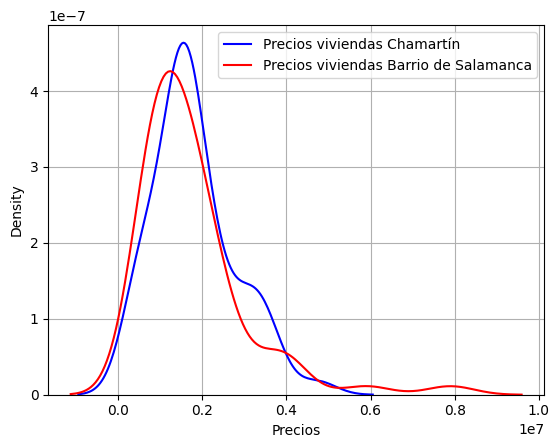

In [70]:
sns.kdeplot(precios_chamartin, color="blue", label="Precios viviendas Chamartín")
sns.kdeplot(precios_salamanca, color="red", label="Precios viviendas Barrio de Salamanca")
plt.grid()
plt.xlabel("Precios")
plt.legend()
plt.show()

##### 3.7.2.3-NIVEL DE SIGNIFICANCIA.

| | Contraste $H_0$ | Contraste $H_1$ |
|-|--|--|
| Real $H_0$ | OK | Tipo I |
| Real $H_1$ | Tipo II | OK |

- $α = 0.05$

In [71]:
alpha = 0.05

##### 3.7.2.4-NORMALIDAD DE LAS MUESTRAS.

In [72]:
# Se realiza la prueba de la normalidad de la distribución de las muestras.
_, p_chamartin = stats.normaltest(precios_chamartin)
_, p_salamanca =stats.normaltest(precios_salamanca)
print("Resultado de las pruebas de Normalidad de las Distribuciones de las muestras:")
print(f"Viviendas del barrio de Chamartín: {p_chamartin}.")
print(f"Viviendas del Barrio de Salamanca: {p_salamanca}.")


Resultado de las pruebas de Normalidad de las Distribuciones de las muestras:
Viviendas del barrio de Chamartín: 0.03014512549868243.
Viviendas del Barrio de Salamanca: 2.854575371623548e-12.


##### 3.7.2.5-HOMOGENEIDAD DE LAS VARIANZAS DE LAS MUESTRAS.

In [73]:
# Se realiza la prueba de Homogeneidad de la varianzas.
_, p_varianza = stats.levene(precios_chamartin, precios_salamanca)
print(f"El resultado de la prueba de Homogeneidad de la Varianza es: {p_varianza}")

El resultado de la prueba de Homogeneidad de la Varianza es: 0.5381682356212261


##### 3.7.2.6-COMPROBACIÓN DE RESULTADOS.

In [74]:
# Se comprueban los valores p obtenidos.
result = p_chamartin > alpha and p_salamanca > alpha and p_varianza > alpha
if result:
    print("Se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.")
else:
    print("NO se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.")

NO se cumple con la asumpción de NORMALIDAD Y HOMOGENEIDAD DE VARIANZAS.


Dado que las muestras objeto de estudio para el contraste de las hipótesis no tienen una distribución normal, sus varianzas no son homogéneas y hay presencia de outliers, se va a proceder a realizar pruebas de tipo "no paramétricas".

##### 3.7.2.7-PRUEBA DE MANN-WHITNEY U

In [75]:
# Prueba de Mann-Whitney U
u_statistic, p_value = mannwhitneyu(precios_chamartin, precios_salamanca)

print(f"El resultado de Estadístico U es: {u_statistic}.")
print(f"El resultado del Valor p es: {p_value}.")

if p_value < alpha:
    print("Se rechaza la hipótesis nula H0. Existe suficiente evidencia para dar por válida la hipótesis H1")
else:
    print("No se puede rechazar la hipótesis nula H0.")


El resultado de Estadístico U es: 1881.5.
El resultado del Valor p es: 0.32499442923557254.
No se puede rechazar la hipótesis nula H0.
